# DETECTION OF AUTISM IN TODDLERS USING MACHINE LEARNING

#### IMPORTING LIBRARY 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/Hp/Documents/Qchat_Full_Polish_Cleaned.csv")

In [3]:
data.head()

,child_ID,sex,age,group,asd_risk,sum_qchat,Q01,Q02,Q03,Q04,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,288,1,24,1,1,37,2,2,1,0,...,1,4,1,4,4,0,0,0,0,3
1,FS/2510,2,23,1,1,37,2,1,0,4,...,0,4,0,1,0,2,0,0,0,0
2,220,1,18,1,1,45,2,3,4,2,...,2,3,2,2,0,0,0,0,0,0
3,FS/2762,1,20,1,1,52,4,2,0,4,...,3,1,0,2,0,2,0,2,1,2
4,238,2,19,1,1,39,1,2,1,1,...,3,4,2,2,1,0,1,3,0,2


## DATA DESCRIPTION

The dataset columns consists of the q1-25 and some personal information on the individuals/toddlers. The q1-25 representation is described below:
- q1: Does your child look at you when you call his/her name?
- q2: How easy is it for you to get eye contact with your 
child?
- q3: When your child is playing alone, does s/he line objects 
up?
- q4: Can other people easily understand your child’s speech?
- q5: Does your child point to indicate that s/he wants 
something (e.g. a toy that is out of reach)?
- q6: Does your child point to share interest with you (e.g. 
pointing at an interesting sight)?
- q7: How long can your child’s interest be maintained by a spinning object 
(e.g. washing machine, electric fan, toy car wheels)?
- q8: How many words can your child say?
- q9: Does your child pretend (e.g. care for dolls, talk on a toy 
phone)?
- q10: Does your child follow where you’re looking?
- q11: . How often does your child sniff or lick unusual 
objects?
- q12: Does your child place your hand on an object when s/he 
wants you to use it (e.g. on a door handle when s/he wants you to 
open the door, on a toy when s/he wants you to activate it)?
- q13: Does your child walk on tiptoe?
- q14: How easy is it for your child to adapt when his/her 
routine changes or when things are out of their usual 
place?
- q15: If you or someone else in the family is visibly upset, does 
your child show signs of wanting to comfort them 
(e.g. stroking their hair, hugging them)?
- q16: Does your child do the same thing over and 
over again (e.g. running the tap, turning the light 
switch on and off, opening and closing doors)?
- q17: Would you describe your child’s first words 
as:
- q18: Does your child echo things s/he hears (e.g. things 
that you say, lines from songs or movies, sounds)?
- q19: Does your child use simple gestures (e.g. wave goodbye)?
- q20: Does your child make unusual finger movements near his/her eyes?
- q21:  Does your child spontaneously look at your face to 
check your reaction when faced with something 
unfamiliar?
- q22: How long can your child’s interest be maintained by 
just one or two objects?
- q23: Does your child twiddle objects 
repetitively (e.g. pieces of string)?
- q24: Does your child seem oversensitive to noise?
- q25: Does your child stare at nothing with no apparent 
purpose?

### EXPLORATORY DATA ANALYSIS

In [4]:
# the data dimension
data.shape

(1016, 31)

In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   child_ID   1016 non-null   object
 1   sex        1016 non-null   int64 
 2   age        1016 non-null   int64 
 3   group      1016 non-null   int64 
 4   asd_risk   1016 non-null   int64 
 5   sum_qchat  1016 non-null   int64 
 6   Q01        1016 non-null   int64 
 7   Q02        1016 non-null   int64 
 8   Q03        1016 non-null   int64 
 9   Q04        1016 non-null   int64 
 10  Q05        1016 non-null   int64 
 11  Q06        1016 non-null   int64 
 12  Q07        1016 non-null   int64 
 13  Q08        1016 non-null   int64 
 14  Q09        1016 non-null   int64 
 15  Q10        1016 non-null   int64 
 16  Q11        1016 non-null   int64 
 17  Q12        1016 non-null   int64 
 18  Q13        1016 non-null   int64 
 19  Q14        1016 non-null   int64 
 20  Q15        1016 non-null   int

In [6]:
# checking the unique values of the asd column
data["asd_risk"].unique()

array([1, 2], dtype=int64)

In [7]:
# checking the unique values of the sex column
data["sex"].unique()

array([1, 2], dtype=int64)

In [8]:
# checking the unique values of the group column
data["group"].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
# checking the unique values of the sum of qchat column
data["sum_qchat"].unique()

array([37, 45, 52, 39, 48, 32, 46, 29, 38, 35, 40, 67, 49, 41, 26, 27, 33,
        9, 13, 34, 66, 31, 25, 42, 65, 44, 56, 58, 19, 36, 53, 51, 30, 17,
       80, 76, 20, 24, 59, 21, 43, 23, 70, 64, 14, 22, 57, 55, 72, 28, 47,
       54, 50, 69, 63, 74, 18,  8, 60, 16, 12, 62, 11, 15,  6,  7, 10,  5,
        1,  0], dtype=int64)

In [10]:
data.describe()

,sex,age,group,asd_risk,sum_qchat,Q01,Q02,Q03,Q04,Q05,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,...,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,1.409449,24.984252,3.011811,1.065945,32.265748,1.021654,0.856299,1.898622,1.640748,1.083661,...,1.662402,1.395669,1.500984,1.215551,0.987205,1.105315,1.186024,1.108268,1.136811,0.769685
std,0.491974,5.080218,1.273395,0.248308,12.136670,0.888639,0.820321,1.350992,1.382463,1.273407,...,1.356322,1.426333,1.307048,1.313737,1.316374,1.128114,1.031447,1.253209,1.031515,1.059838
min,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,2.000000,1.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,24.000000,4.000000,1.000000,31.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,29.000000,4.000000,1.000000,40.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,36.000000,4.000000,2.000000,80.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### CORRELATION HEATMAP

C:\Users\Hp\AppData\Local\Temp\ipykernel_10288\3631937064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


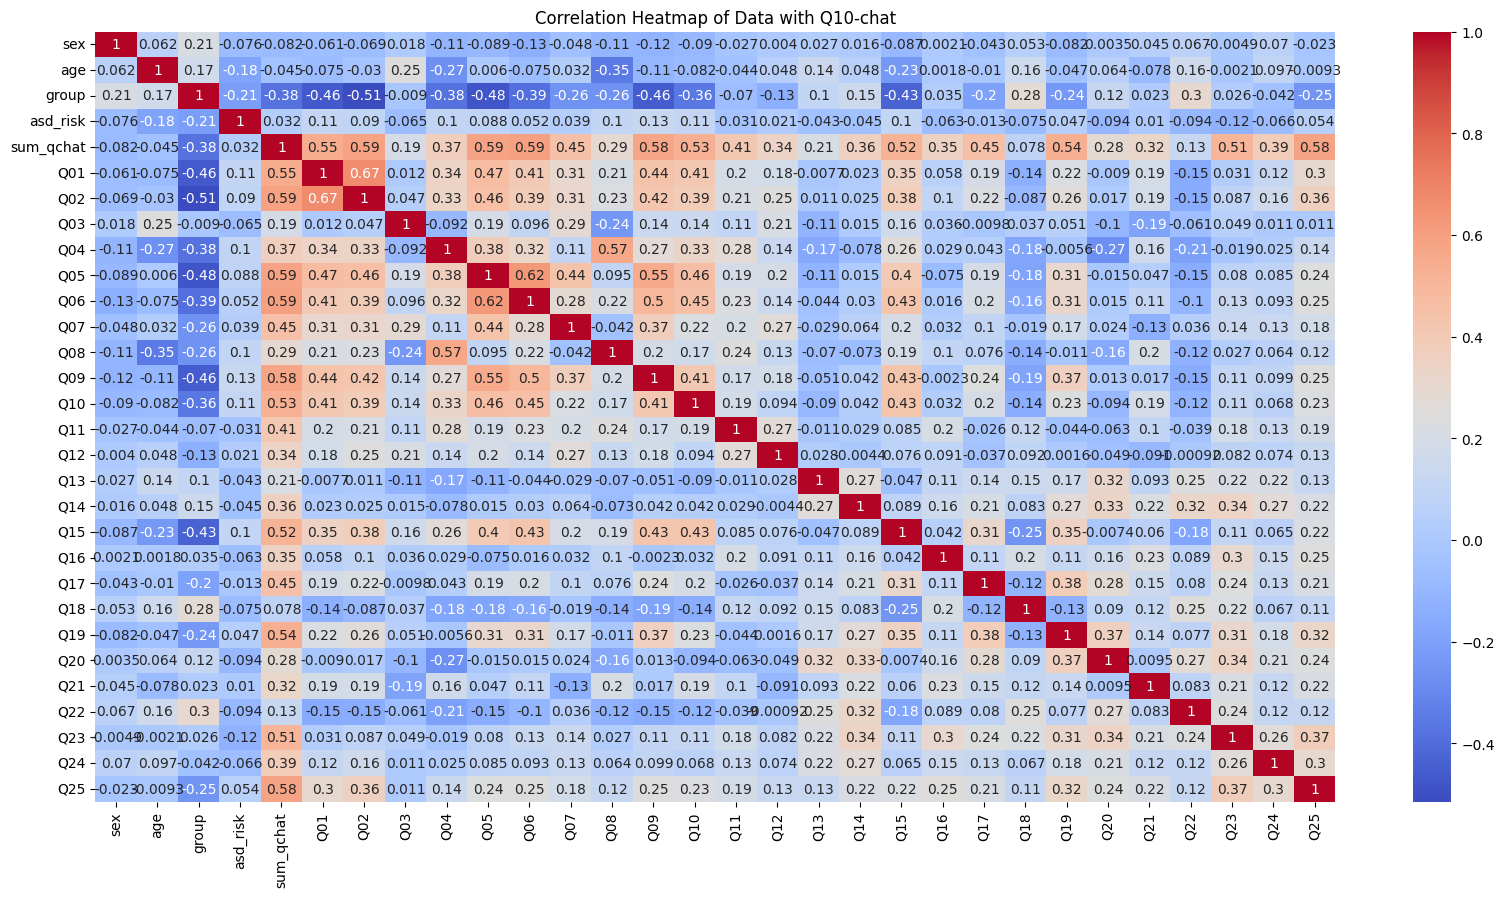

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Data with Q10-chat")
plt.show()

#### WHAT FEATURES FROM Q1 TO Q25 CONTRIBUTES THE MOST IN ASD TRAITS?

In [12]:
# selecting some columns of the dataset 
data.iloc[:, 6:].head()

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,2,2,1,0,1,1,4,0,4,0,...,1,4,1,4,4,0,0,0,0,3
1,2,1,0,4,2,4,0,4,2,3,...,0,4,0,1,0,2,0,0,0,0
2,2,3,4,2,2,2,2,0,4,4,...,2,3,2,2,0,0,0,0,0,0
3,4,2,0,4,4,4,1,1,4,4,...,3,1,0,2,0,2,0,2,1,2
4,1,2,1,1,2,1,3,1,3,1,...,3,4,2,2,1,0,1,3,0,2


[Text(0, 0, '782'),
 Text(0, 0, '870'),
 Text(0, 0, '945'),
 Text(0, 0, '1003'),
 Text(0, 0, '1038'),
 Text(0, 0, '1101'),
 Text(0, 0, '1123'),
 Text(0, 0, '1126'),
 Text(0, 0, '1155'),
 Text(0, 0, '1175'),
 Text(0, 0, '1184'),
 Text(0, 0, '1199'),
 Text(0, 0, '1205'),
 Text(0, 0, '1235'),
 Text(0, 0, '1313'),
 Text(0, 0, '1382'),
 Text(0, 0, '1418'),
 Text(0, 0, '1525'),
 Text(0, 0, '1540'),
 Text(0, 0, '1561'),
 Text(0, 0, '1657'),
 Text(0, 0, '1667'),
 Text(0, 0, '1689'),
 Text(0, 0, '1929'),
 Text(0, 0, '1960')]

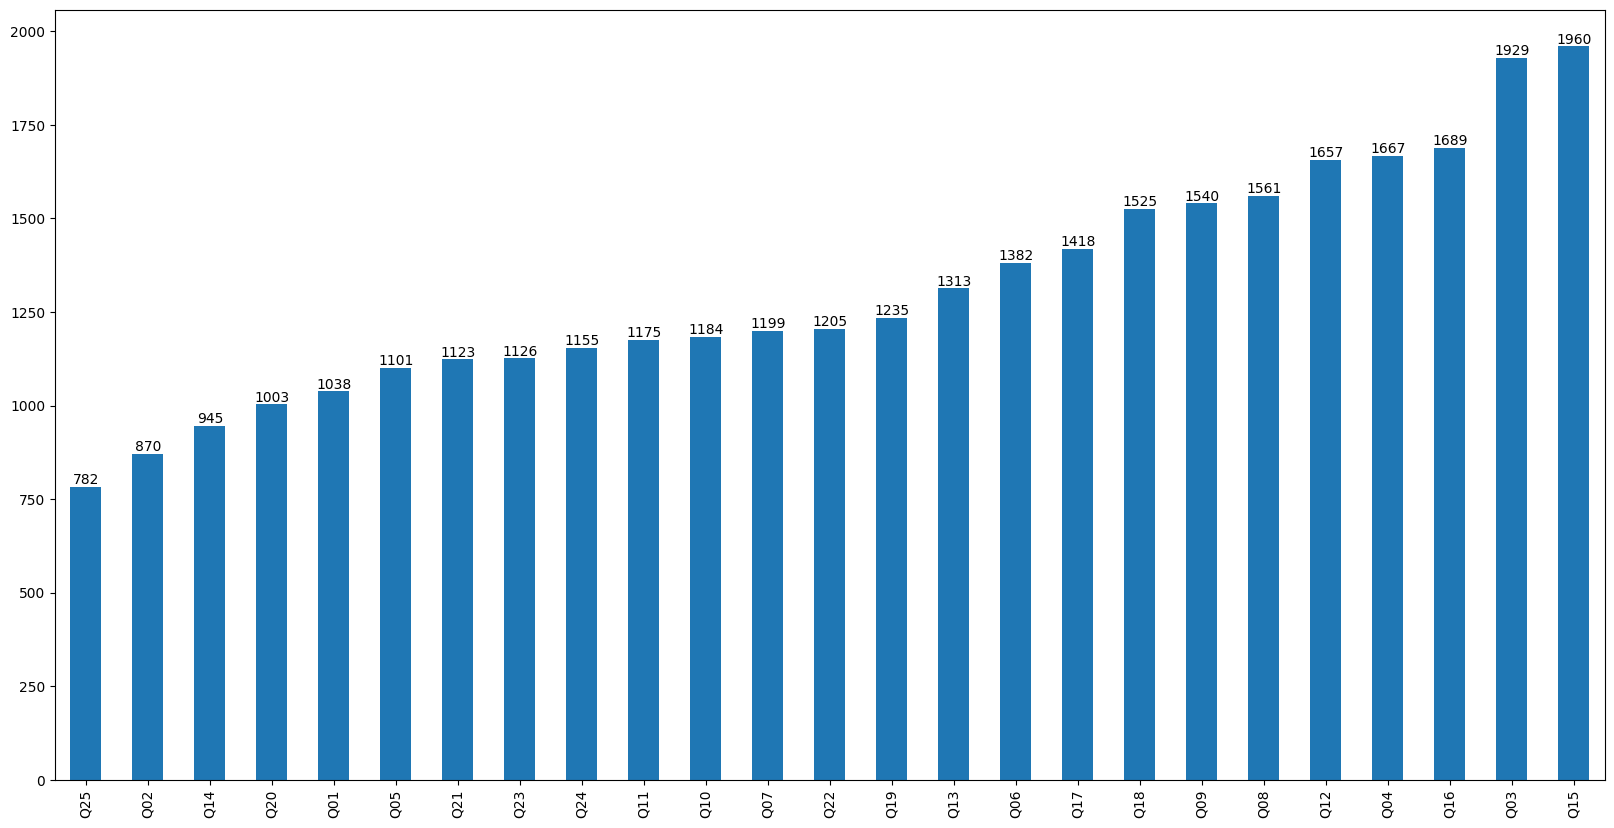

In [13]:
# plotting the sum of value counts of the q25 columns
plt.figure(figsize=(20, 10))
ax = data.iloc[:, 6:].sum().sort_values().plot(kind = "bar")
ax.bar_label(ax.containers[0])

This plot above shows the total count of the itemized q 25 chats.

### GENERAL COUNTPLOT

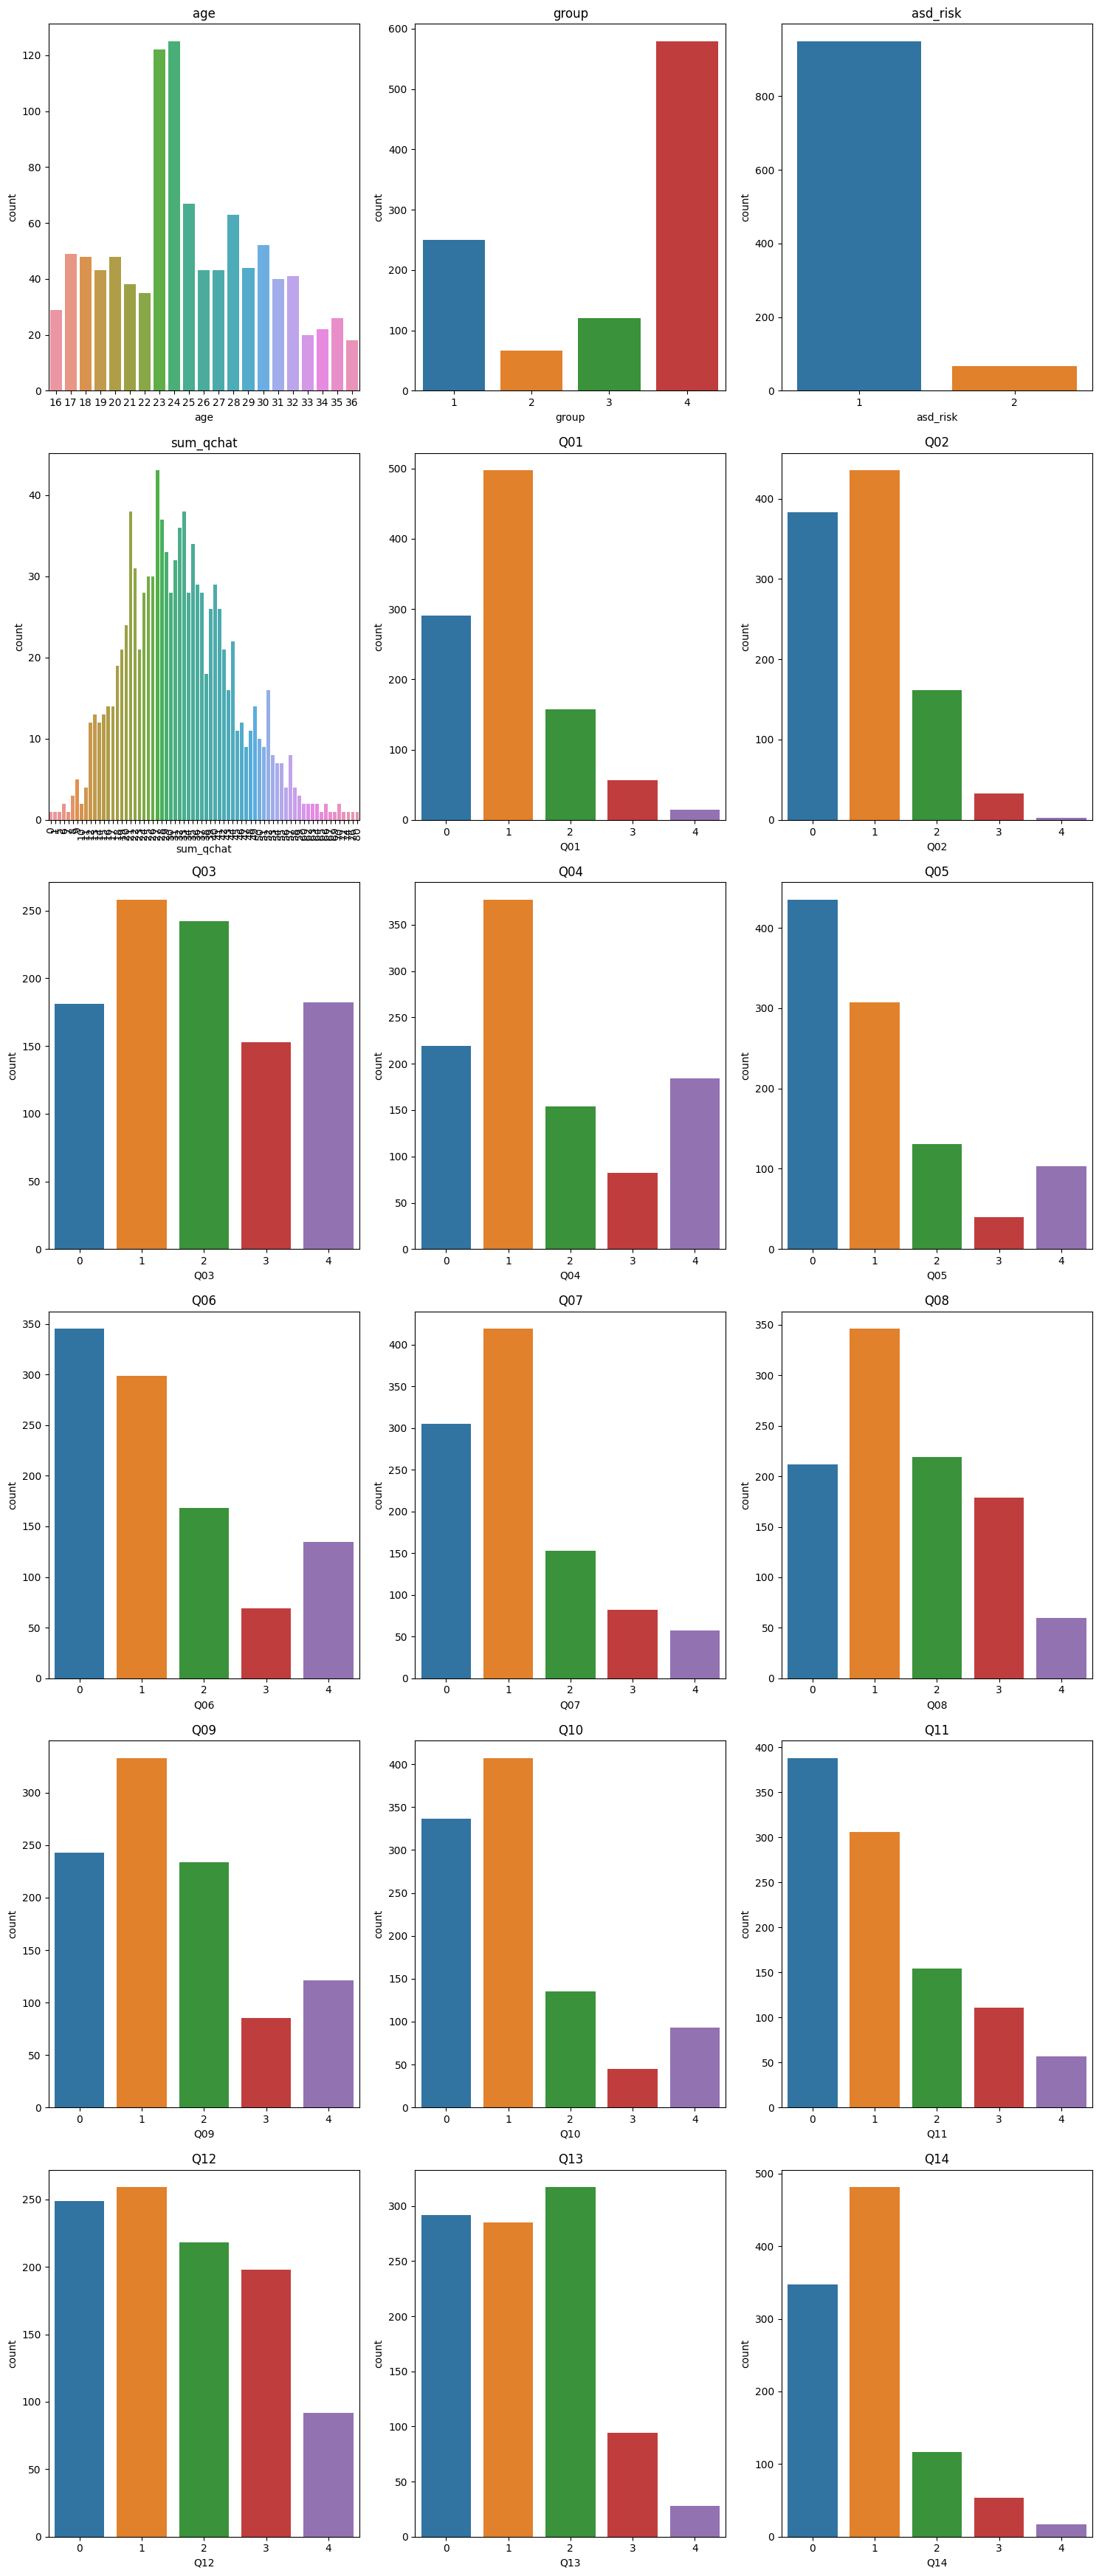

In [14]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:,2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        sns.countplot(x=data[col], ax=axes[i])
        axes[i].set_title(col)
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)
    else:
        break 
plt.tight_layout()
plt.show()

This plot represents the general individual counts for each feature on the dataset.

### DATA DISTRIBUTION ON AGE AND QCHAT 10 SCORE

In [15]:
data.iloc[:, [2, 5]].head(1)

,age,sum_qchat
0,24,37


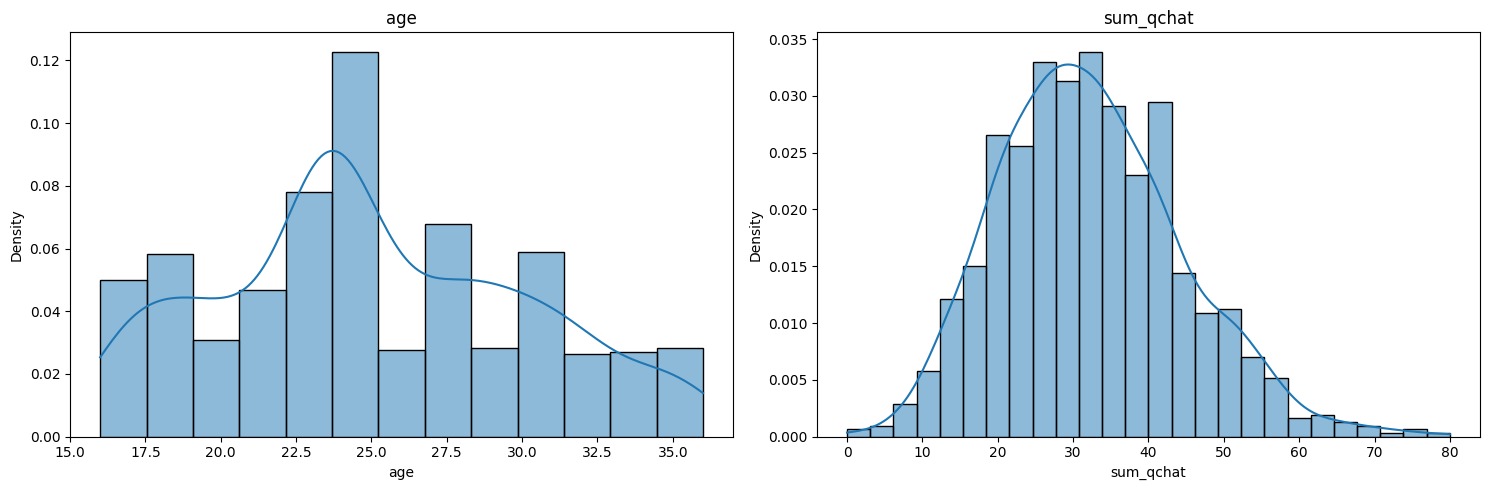

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, [2, 5]]):
    sns.histplot(x = data[col], ax = axes[i], stat="density", kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

The age column in the dataset comprises 1016 entries, each representing an individual. The mean age across all participants is approximately 25 month(24.9), with a standard deviation of around 5 months, indicating a moderate level of variability in age distribution.

The minimum age recorded in the dataset is 16 months, while the maximum age is 36 months. The majority of participants fall within the age range of 21 to 29 months, with 25% of individuals aged below 21 years and 75% below 29 months.

It's noteworthy that the dataset predominantly includes individuals within a relatively narrow age range, with the median age being 24 months. This suggests a somewhat homogeneous age distribution among the participants, albeit with a few outliers towards both the younger and older ends of the spectrum.

## MULTIVARIATE ANALYSIS

### Q-CHAT SUM AND AGE WITH ASD RISK

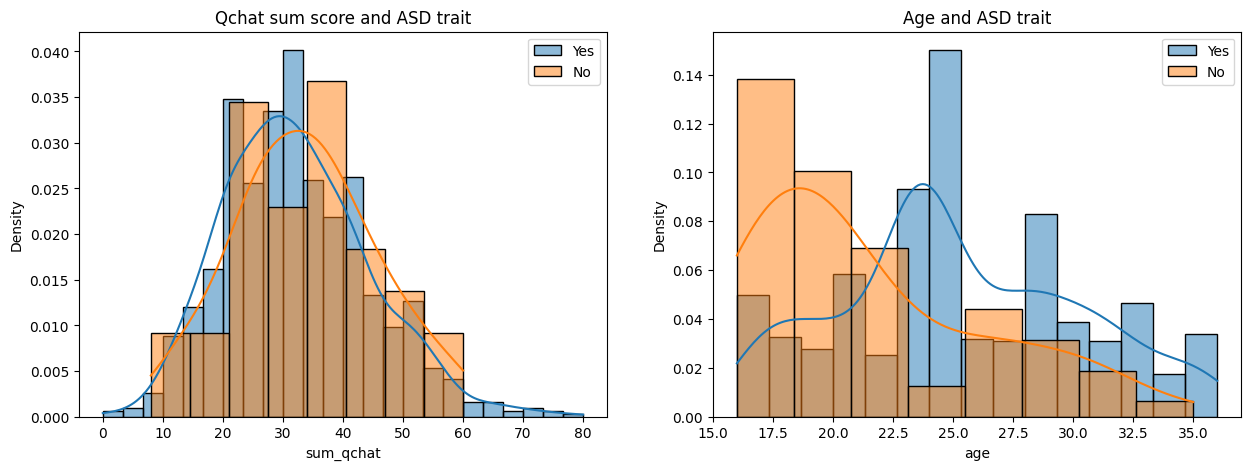

In [17]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))
sns.histplot(x = data[data["asd_risk"] == 1]["sum_qchat"], label = "Yes", ax = axes[0], stat="density", kde = True)
sns.histplot(x = data[data["asd_risk"] == 2]["sum_qchat"], label = "No", ax = axes[0], stat="density", kde = True)

axes[0].set_title("Qchat sum score and ASD trait")
axes[0].legend(loc = "upper right")

sns.histplot(x = (data[data["asd_risk"] == 1]["age"]).astype(int), label = "Yes", ax = axes[1], stat="density", kde = True)
sns.histplot(x = (data[data["asd_risk"] == 2]["age"]).astype(int), label = "No", ax = axes[1], stat="density", kde = True)

axes[1].set_title("Age and ASD trait")
axes[1].legend(loc = "upper right")
plt.show()

The analysis of ASD risk levels reveals notable variations in Q-CHAT scores, providing valuable insights into the potential correlation between ASD risk and questionnaire responses. Here is a comprehensive overview:

- ASD Risk Level 1: Scores within this category range from 0 to approximately 65, exhibiting variability and the presence of outliers. The median Q-CHAT score stands at 31, with the 25th and 75th percentiles recorded at 23 and 40, respectively. These statistics suggest a diverse distribution of scores, indicating varying levels of social communication behaviors among participants categorized under ASD Risk Level 1.

- ASD Risk Level 2: Scores for participants in this group range from approximately 8 to 60, with a median score of 35. The 25th and 75th percentiles are observed at scores 27 and 41, respectively. Notably, individuals classified with higher ASD risk levels tend to exhibit higher Q-CHAT scores, suggesting a potential association between elevated ASD risk and increased social communication challenges as reflected in questionnaire responses.

The observed trends underscore the importance of considering ASD risk levels in understanding the nuances of social communication behaviors and potential indicators of autism spectrum disorders. Although there seems to be a relationship between ASD RISK 1 and high Total QCHAT Score further exploration into the relationship between ASD risk levels and Q-CHAT scores may provide valuable insights into early detection and intervention strategies for individuals at risk of ASD.

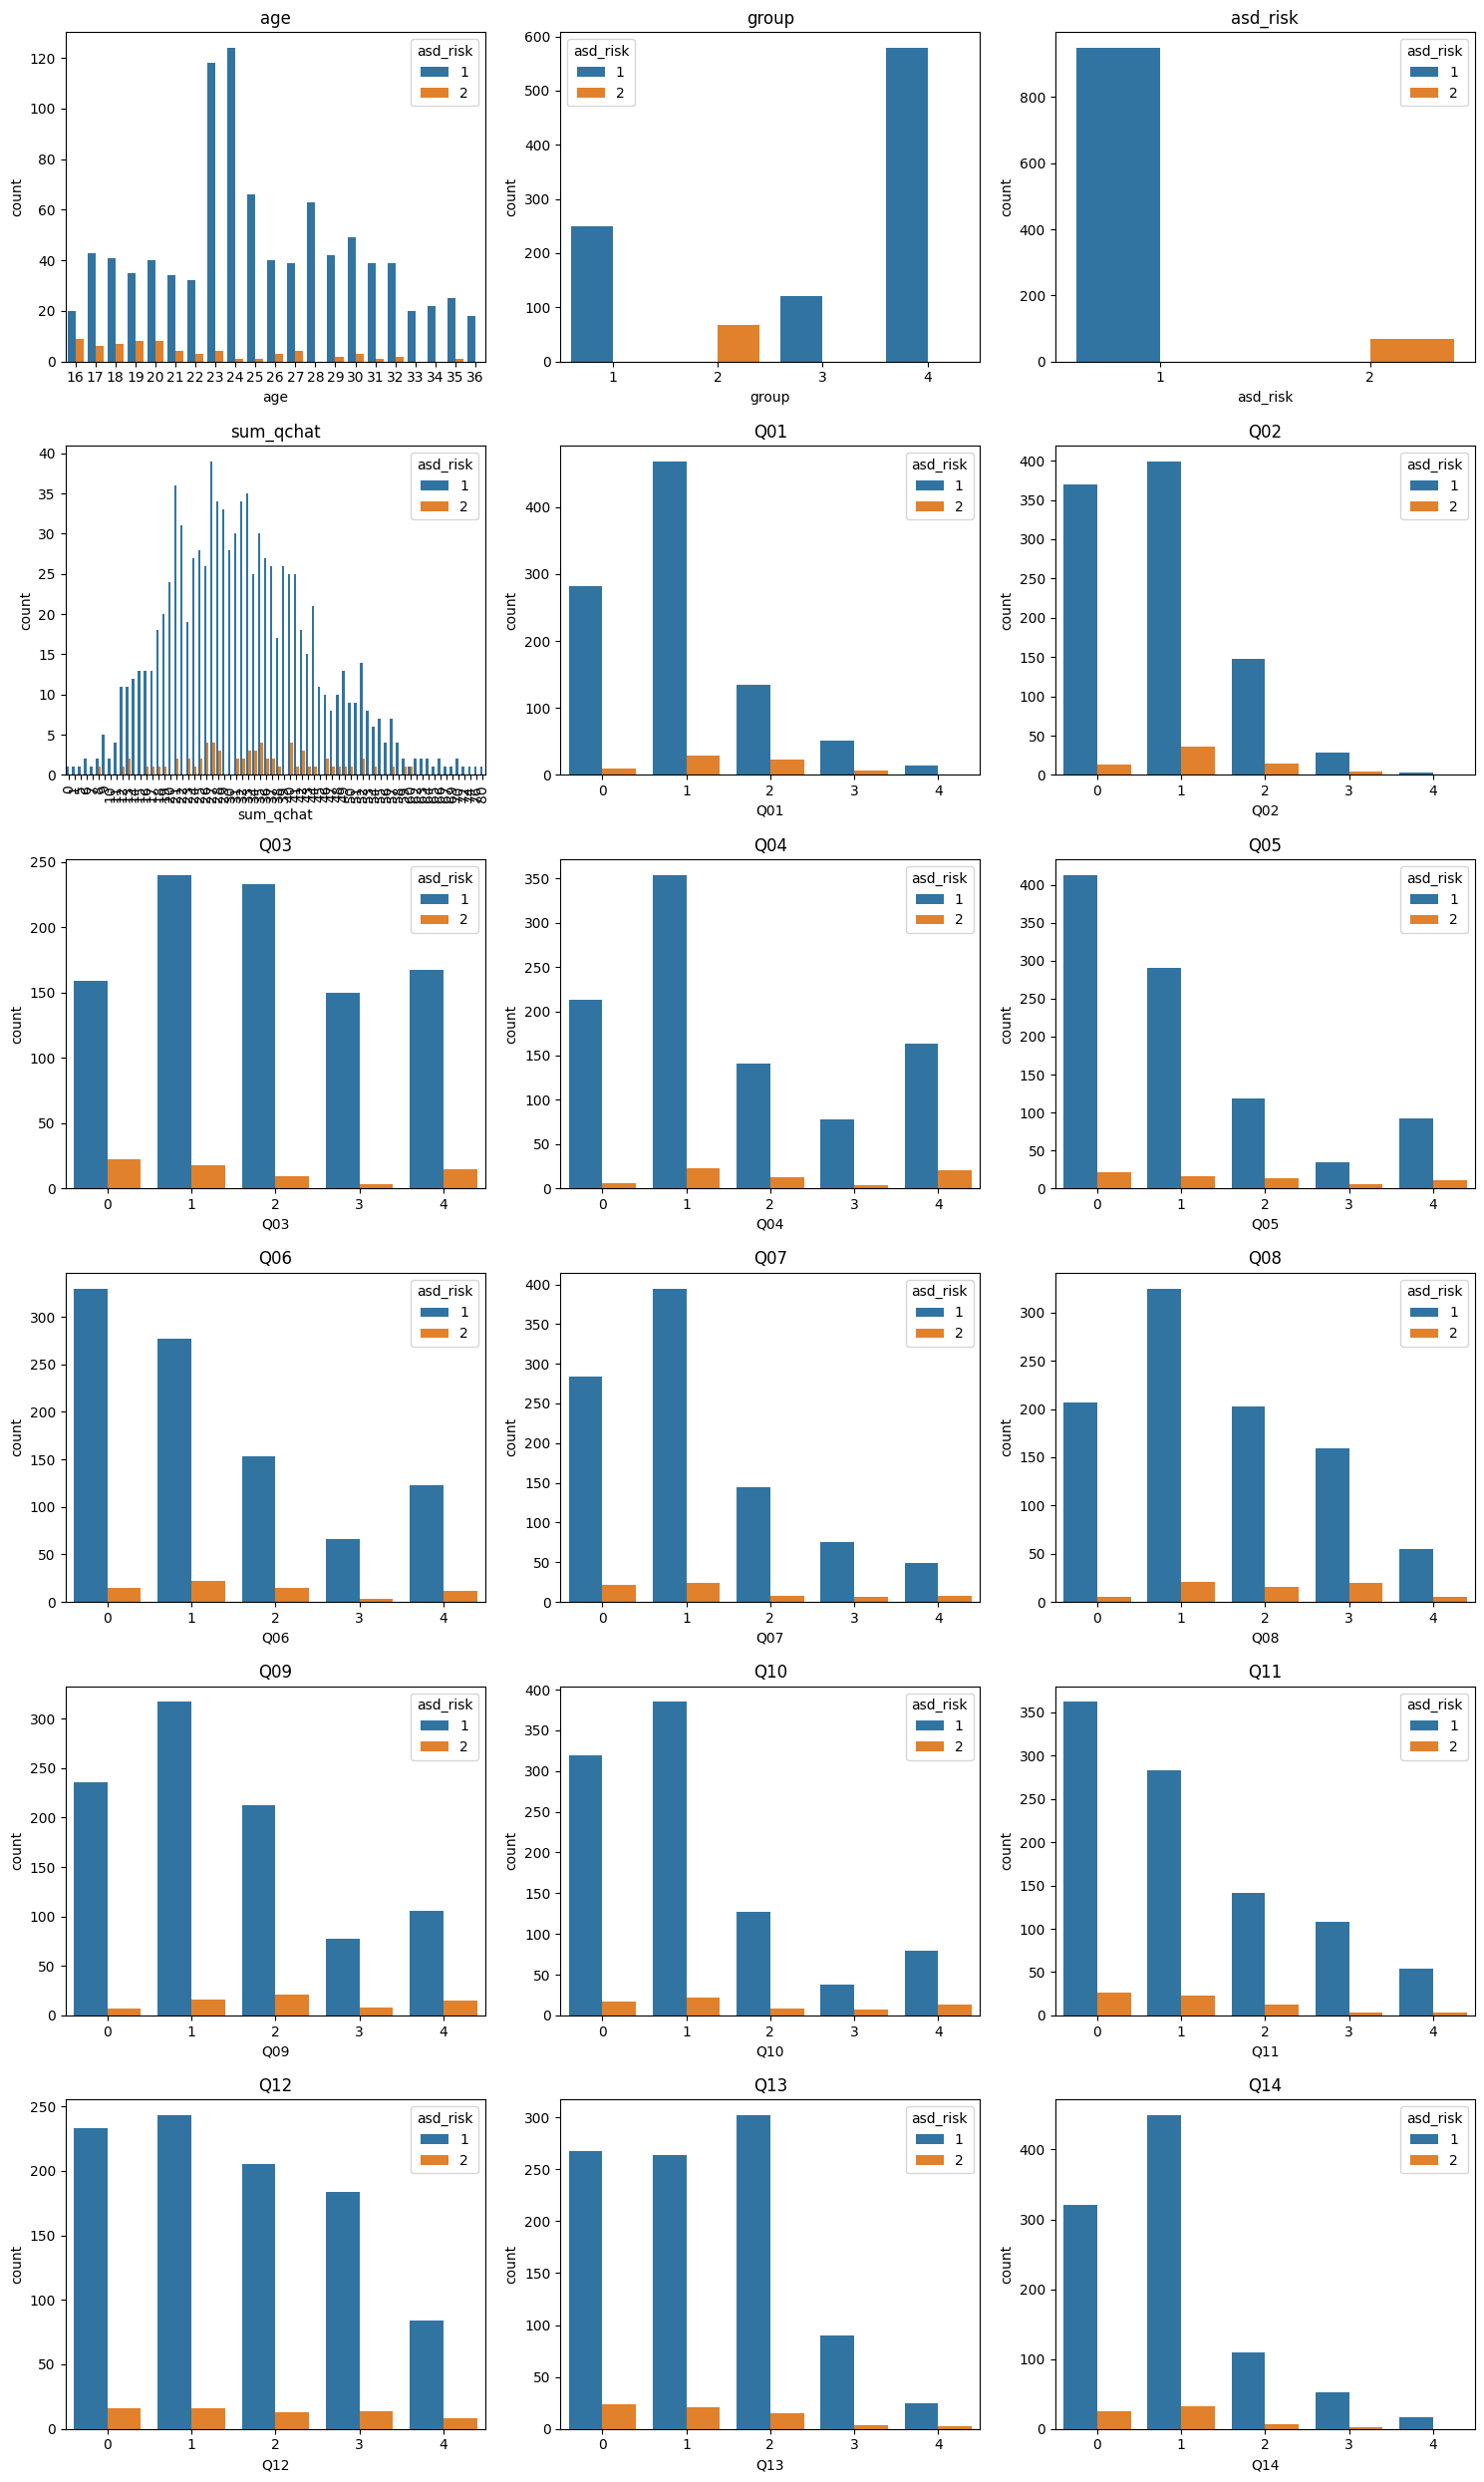

In [18]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:,2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        sns.countplot(x = data[col], hue = data["asd_risk"], ax = axes[i])
        axes[i].set_title(col)
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)
    else:
        break
plt.tight_layout()
plt.show()

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the asd risk. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the asd risk. This helps to show how the distribution varies across different features in the dataset.

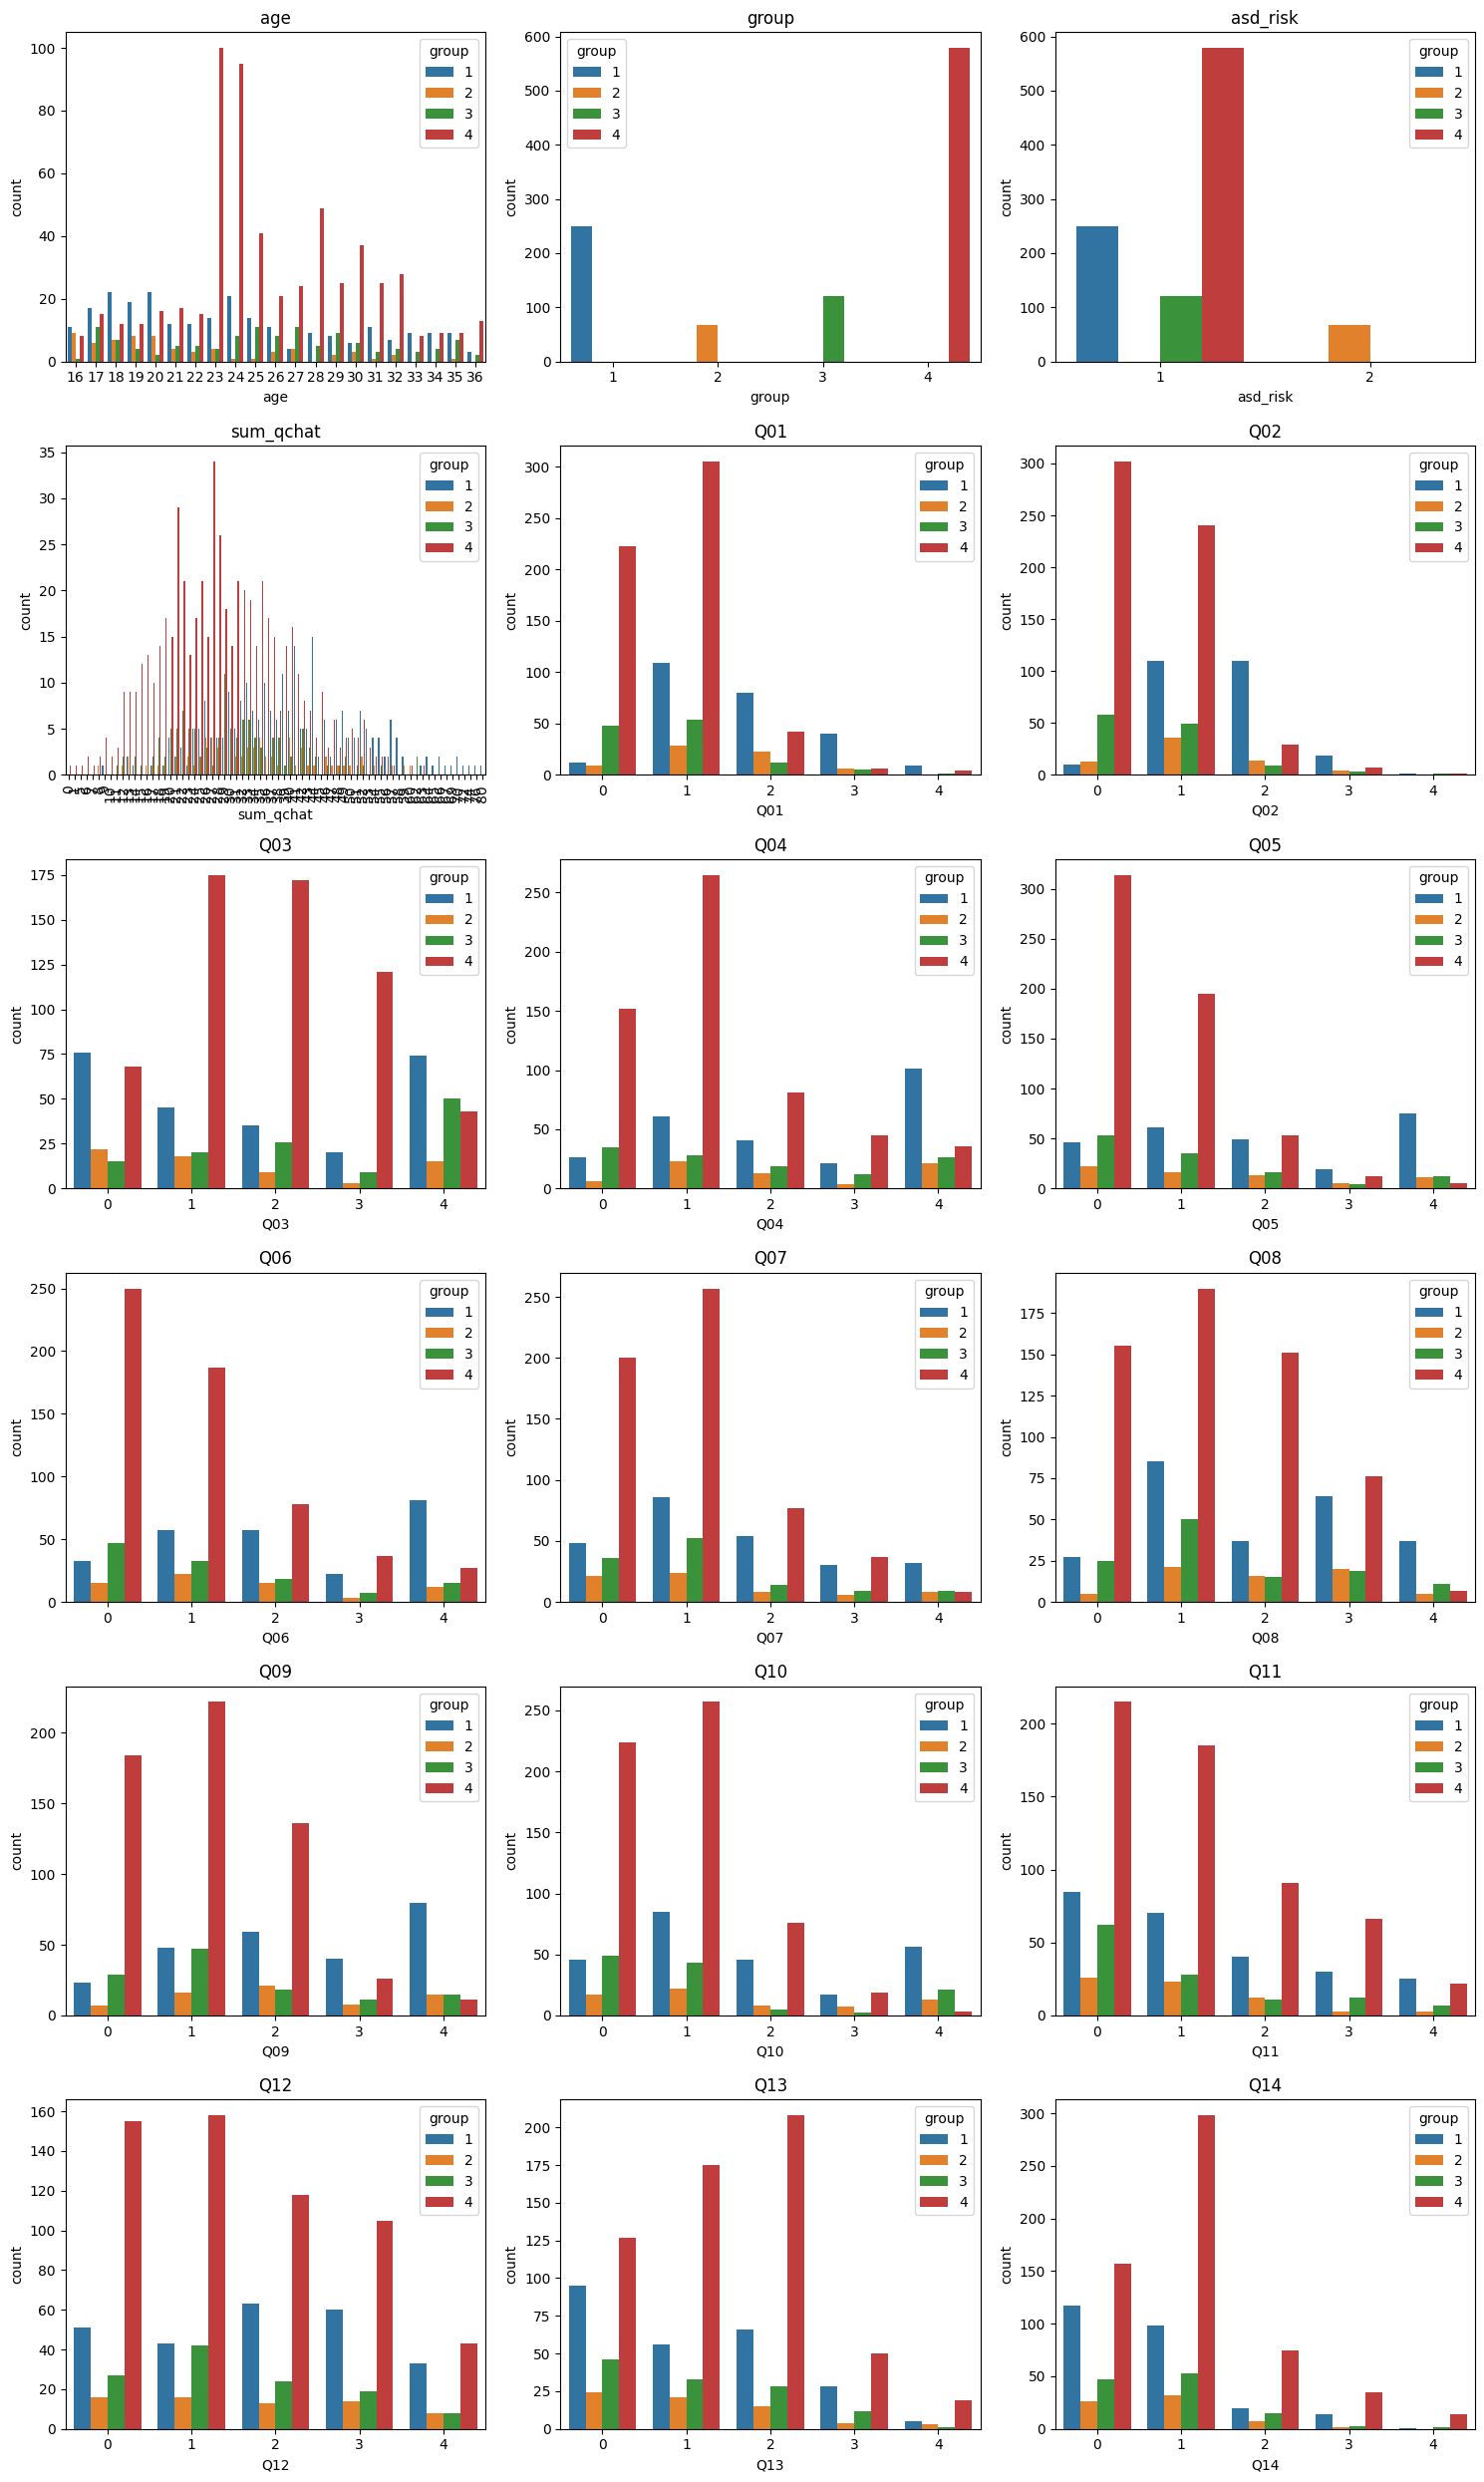

In [19]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:,2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        sns.countplot(x = data[col], hue = data["group"], ax = axes[i])
        axes[i].set_title(col)
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)
    else:
        break
plt.tight_layout()
plt.show()

The age distribution across the various groups exhibits distinct patterns and central tendencies, providing valuable insights into the developmental stages represented within each group. Here is a detailed summary:

- Group 1: The median age for participants in this group is approximately 23.0 months, with the age range spanning from 16 to 36 months. The 25th percentile falls between 18.5 and 19 months, while the 75th percentile is around the 28.0-month mark.

- Group 2: Within this group, the median age is observed to be around the 20th month, with the 25th percentile occurring at approximately the 18th month and the 75th percentile at approximately 24.5 months. The maximum age recorded is 36 months.

- Group 3: Participants in this group exhibit a median age of approximately 26 months, with the 25th percentile occurring around the 22nd month and the 75th percentile around the 29th month. Similar to the other groups, the maximum age observed is 36 months.

- Group 4: The median age for participants in this group is approximately 24 months, with the 25th percentile occurring around the 23.5-month mark and the 75th percentile around the 29th month. As with the other groups, the maximum age recorded is 36 months.

Overall, the age distribution within each group suggests a relatively even spread, indicating a diverse representation of developmental stages. However, it is worth noting that Group 2 exhibits a slightly narrower age range compared to the other groups with presence of an outlier, which may warrant further investigation into potential underlying factors influencing participant demographics.

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the groups. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the group. This helps to show how the distribution varies across different features in the dataset.

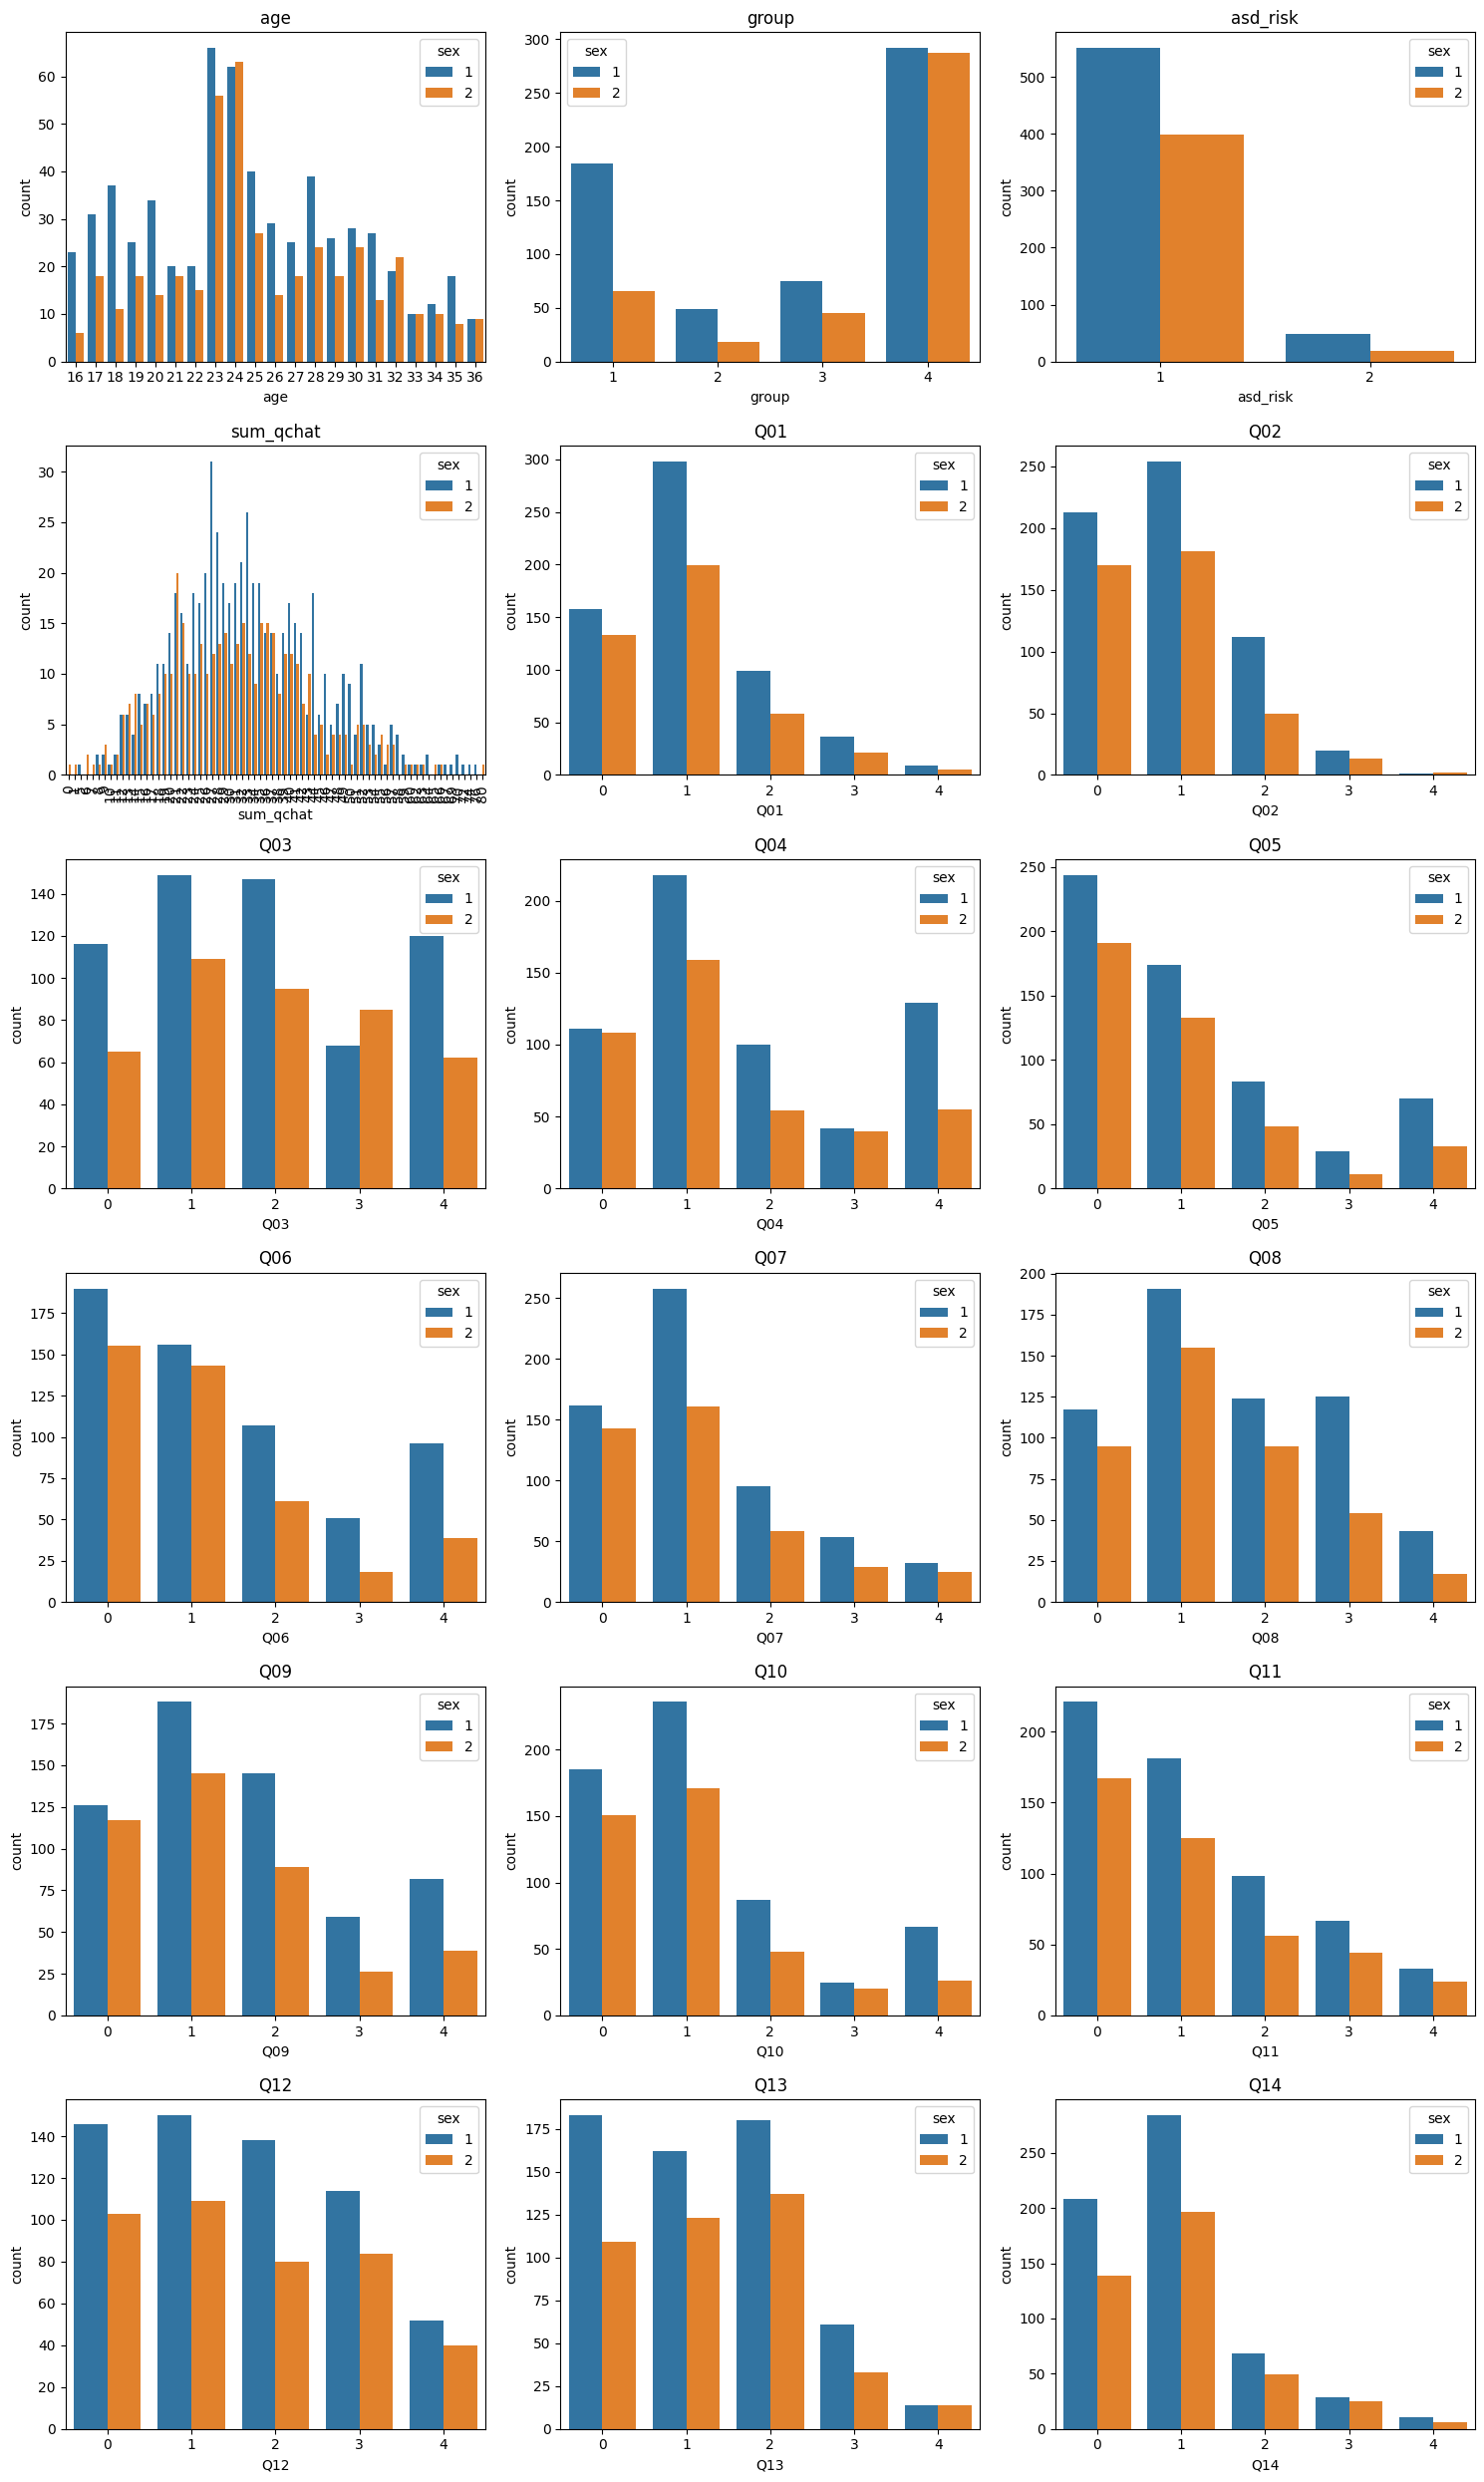

In [20]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:,2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        sns.countplot(x = data[col], hue = data["sex"], ax = axes[i])
        axes[i].set_title(col)
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)
    else:
        break  
plt.tight_layout()
plt.show()

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the sex of each patient. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the sex. This helps to show how the distribution varies across different features in the dataset, segmenting the data based on the sex.

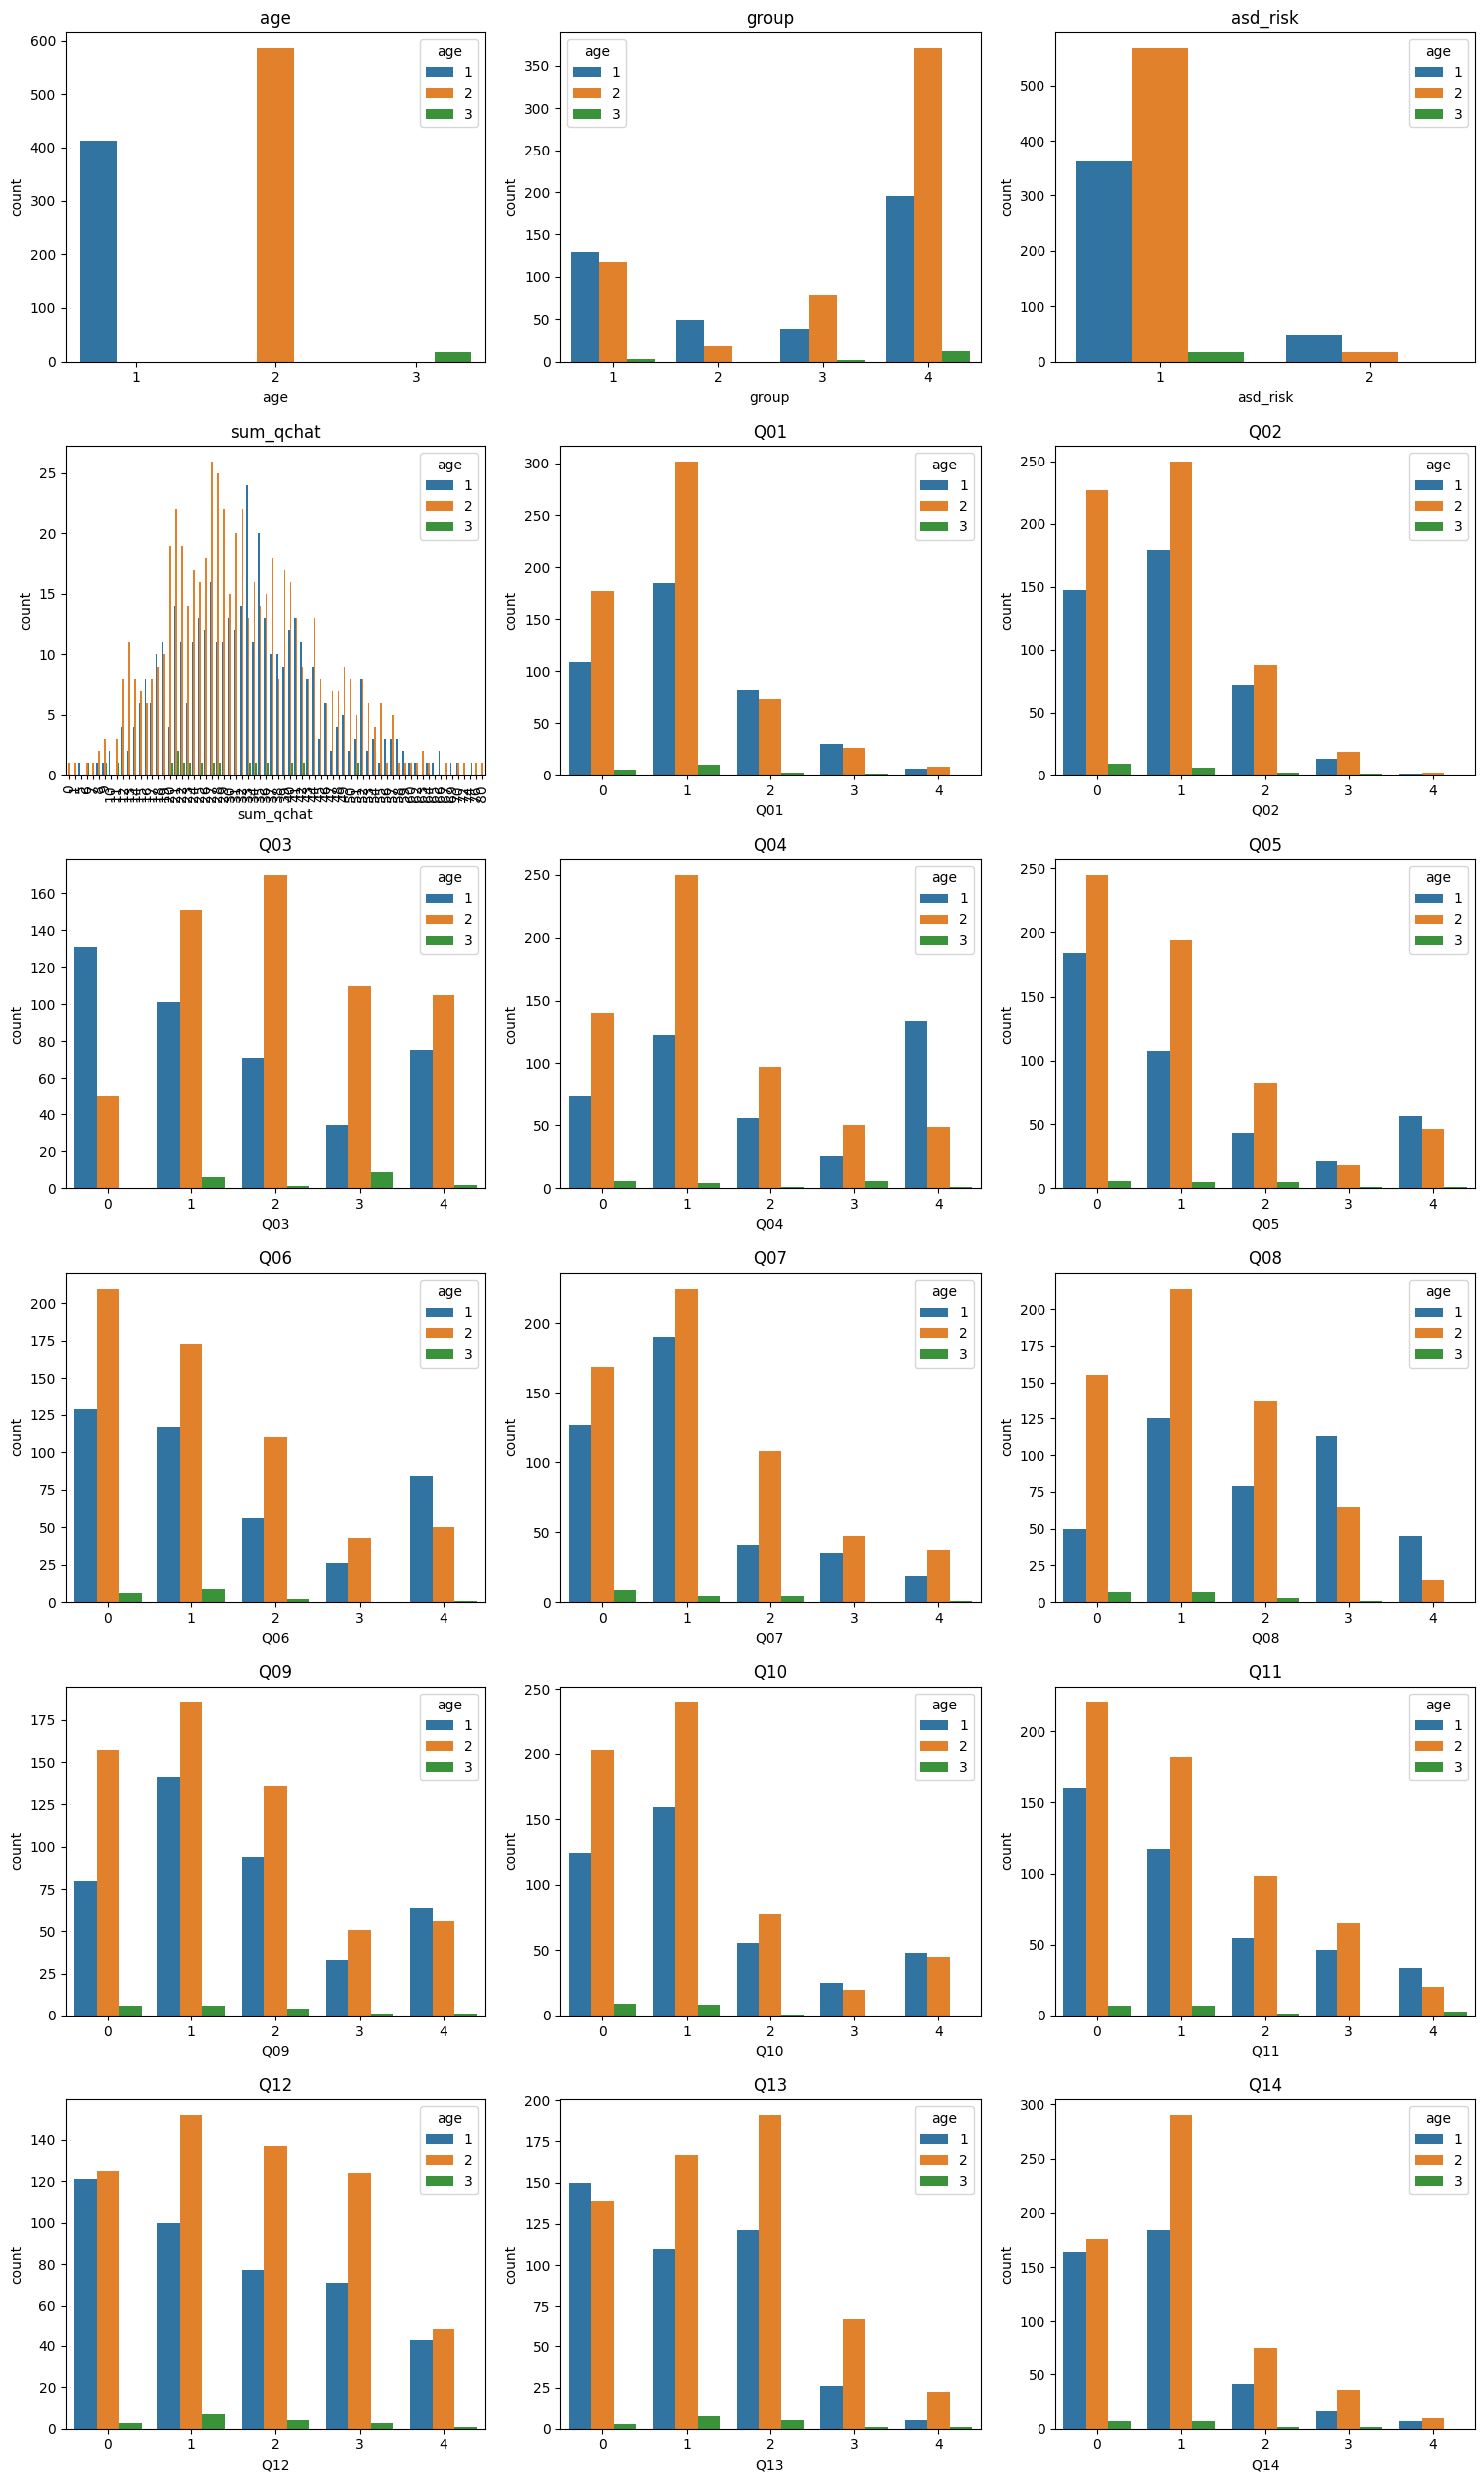

In [21]:
data["age"] = (data["age"] / 12).astype(int)

fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()

for i, col in enumerate(data.iloc[:,2:]):  # Adjust indexing if necessary
    if i < len(axes):
        sns.countplot(x=data[col], ax=axes[i], hue = data["age"]) 
        axes[i].set_title(col)
        if col == "sum_qchat":
            axes[i].tick_params(axis='x', labelrotation=90)
    else:
        break
plt.tight_layout()
plt.show()

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the age of each patient which was further divided by 12 to give a monthly interval/segment scale. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the age. This helps to show how the distribution varies across different features in the dataset, segmenting the data based on the age.

In [22]:
color = sns.color_palette("tab10")[0]

# This function displays the values in the diagram
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
        
# A function to help visualize the number of occurrences of a category
def count_plot(df,xvar):
    sns.countplot(data=df,x=xvar, color = color)
    plt.title(f"Distribution of {xvar}".title(), weight ="bold")
    plt.xlabel(xvar.title(), weight = "bold")
    plt.ylabel("Frequency", weight = "bold")

## DISTRIBUTION OF GROUPS

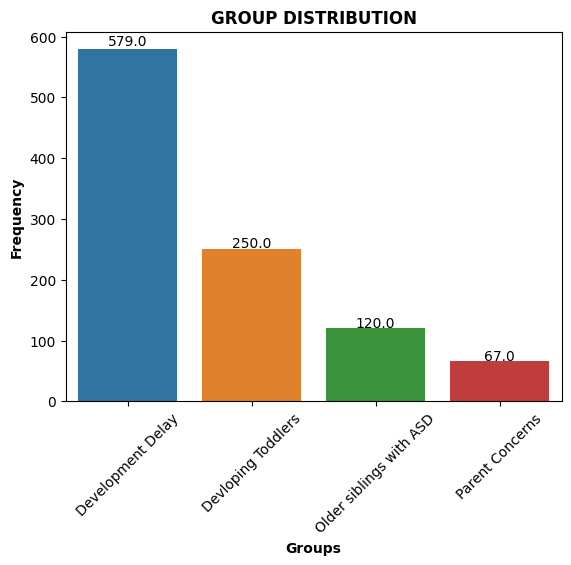

In [23]:
# plots the univariate analysis of the group column
val_count = data.group.value_counts()
val_count.index

group = sns.countplot(x = data["group"], data = data, order = val_count.index)
show_values(group)
plt.gca().set_xticklabels(["Development Delay","Devloping Toddlers", "Older siblings with ASD", "Parent Concerns"])
plt.xticks(rotation = 45)
plt.title("GROUP DISTRIBUTION", weight = "bold")
plt.ylabel("Frequency", weight = "bold")
plt.xlabel("Groups", weight = "bold")
plt.show()

The group column in the dataset categorizes participants into four distinct groups based on certain criteria. Among these groups, Developmental Delay (Group 4) exhibits the highest frequency, with a total count of 579 individuals. Following this, Developing Toddlers (Group 1) represents the second-highest count, comprising 250 individuals. The third-highest count is attributed to Older Siblings with ASD (Group 3), accounting for 120 individuals. Notably, the group with the lowest count is Parent Concerns (Group 2), with only 67 individuals falling into this category.

## QCHAT SCORE ANALYSIS

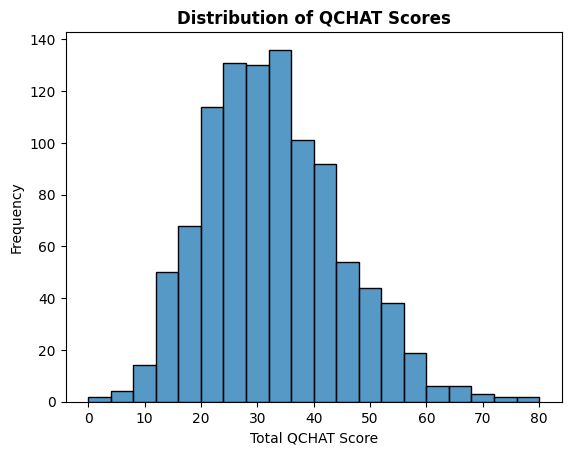

In [24]:
# plots the univariate scores of the qchat scores
sns.histplot(data['sum_qchat'], bins=20)
plt.title('Distribution of QCHAT Scores', weight ="bold")
plt.xlabel('Total QCHAT Score')
plt.ylabel('Frequency')
plt.show()

These statistics offer insights into the distribution and central tendency of the Q-CHAT scores within the dataset. The mean score of approximately 32.27 indicates the average score across all participants, suggesting a moderate level of ASD-related behaviors among the sample. The standard deviation of approximately 12.14 reflects the dispersion or variability of scores around the mean. Additionally, the quartile values (25th, 50th, and 75th percentiles) provide information about the spread of scores and the central tendency within the dataset. Finally, the minimum and maximum values indicate the range of scores observed, with the lowest score being 0 and the highest being 80, suggesting variability in the severity of ASD-related behaviors among participants

## SCATTER PLOTS OF TOTAL QCHAT AND TARGET ASD RISK 

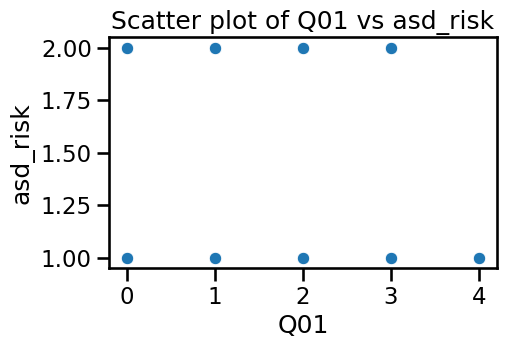

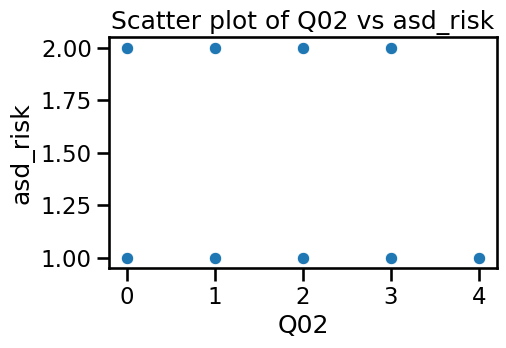

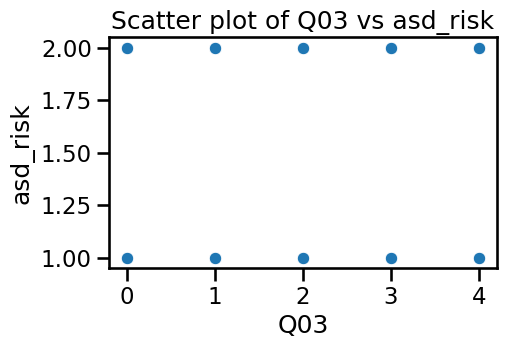

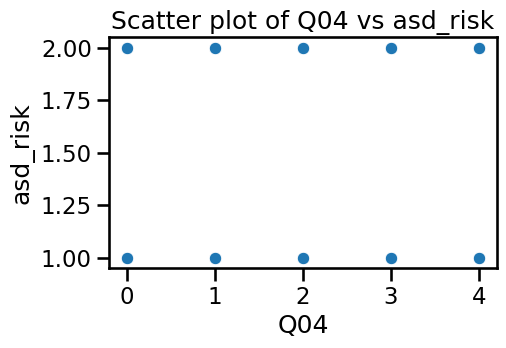

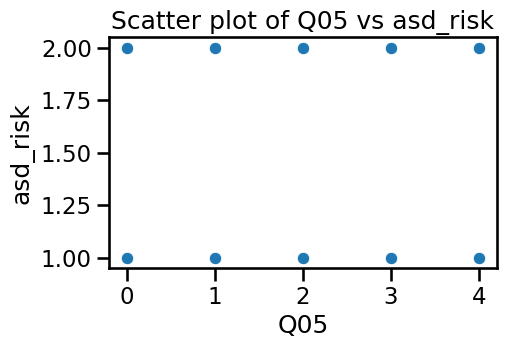

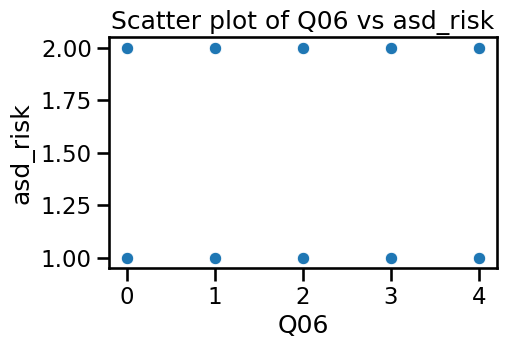

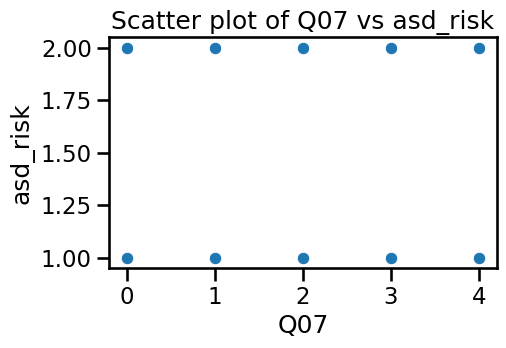

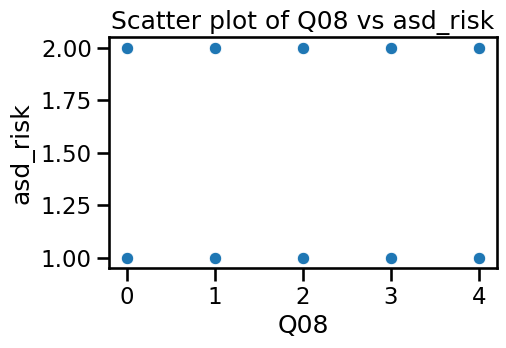

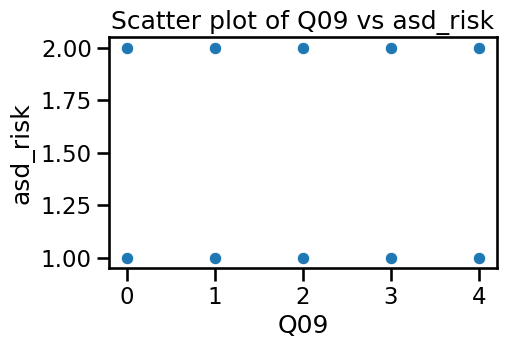

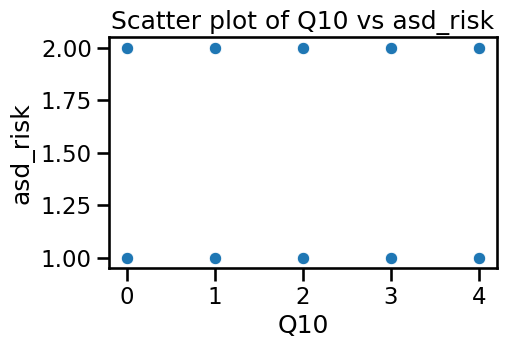

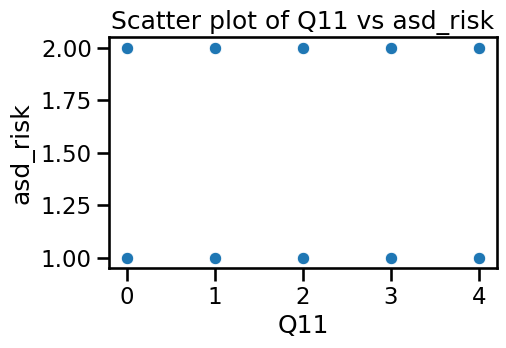

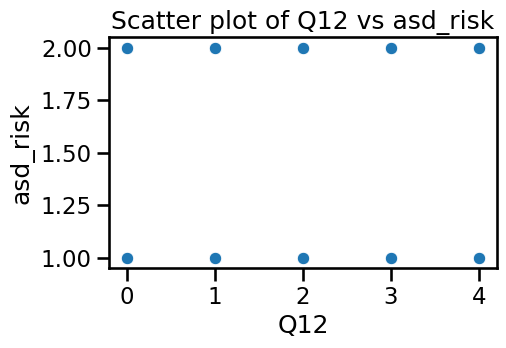

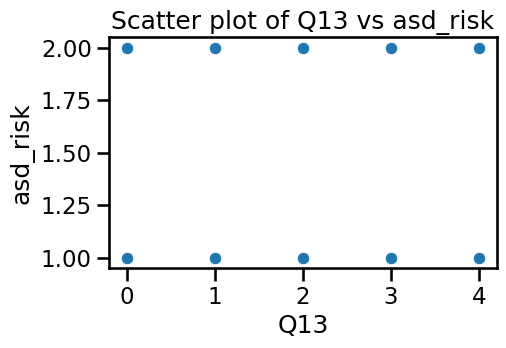

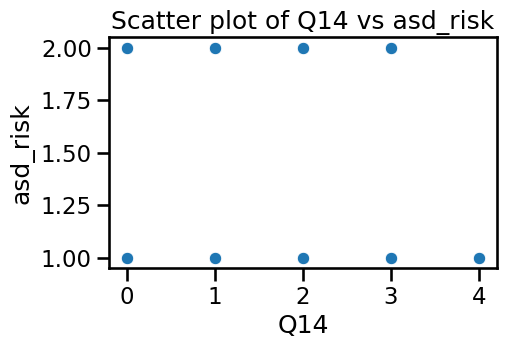

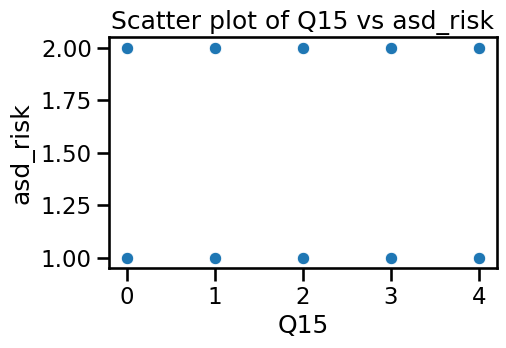

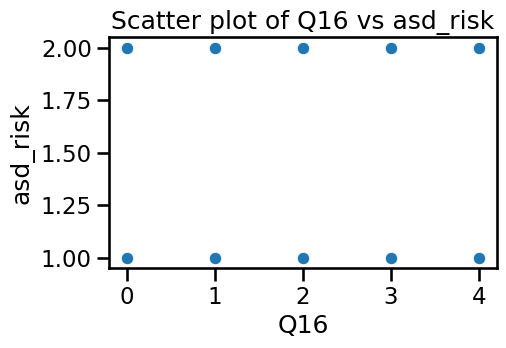

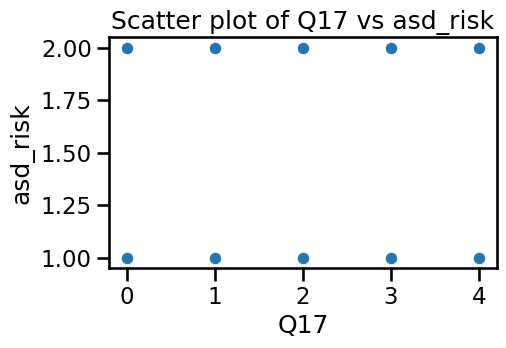

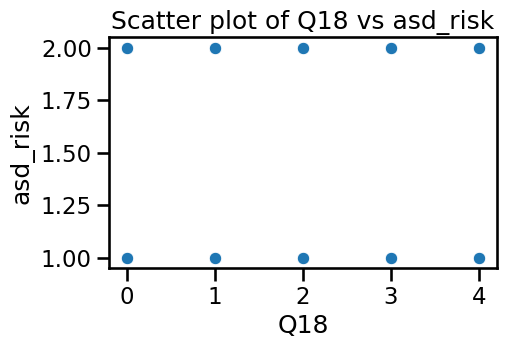

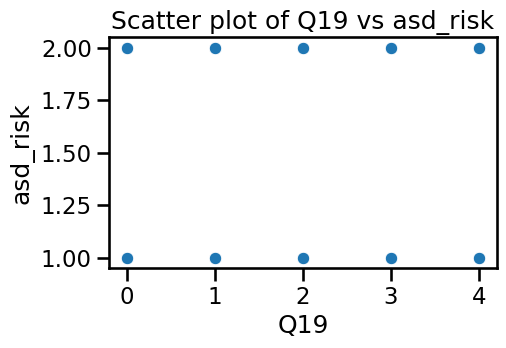

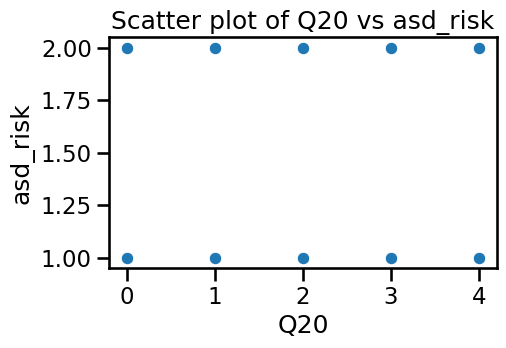

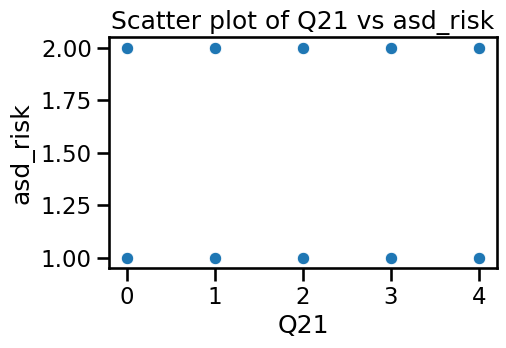

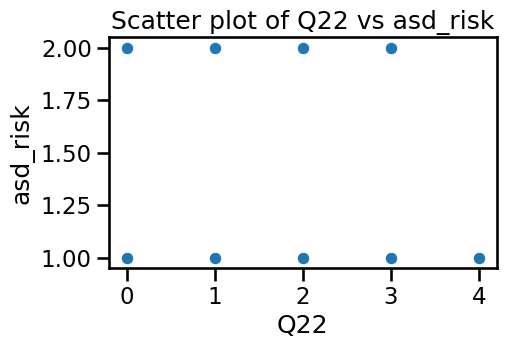

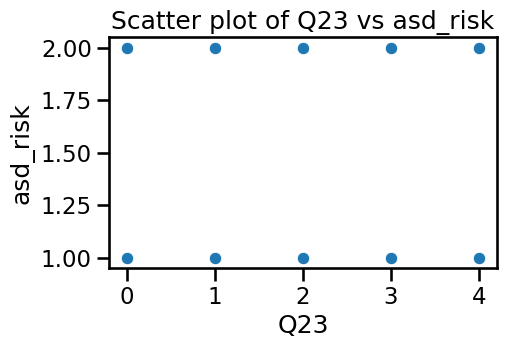

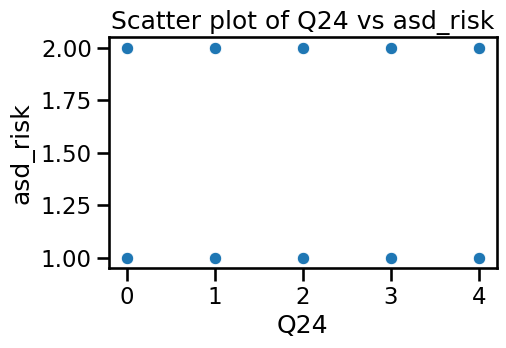

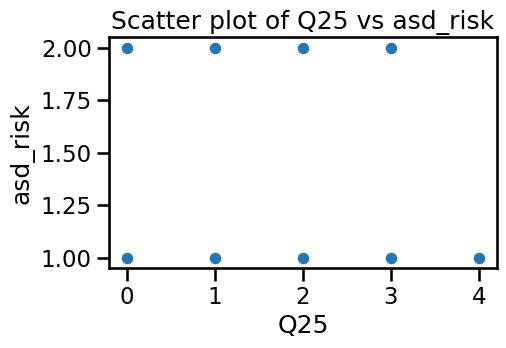

In [25]:
# plots the scatter plot of the asd risk and the q1-25 chats
target = data.iloc[:, 4] # 5th column which is the asd risk column
features = data.iloc[:, 6:] # 7th column to the last

sns.set_context("talk")

for column in features.columns:
    plt.figure(figsize =(5, 3))
    sns.scatterplot(x=features[column], y=target)
    plt.title(f"Scatter plot of {column} vs {target.name}")
    plt.xlabel(column)
    plt.ylabel(target.name)
    plt.show()

# MACHINE LEARNING

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### PREPROCESSING OF THE DATA

In [27]:
dataset = pd.read_csv("C:/Users/Hp/Documents/Qchat_Full_Polish_Cleaned.csv")

In [28]:
dataset.head(2)

,child_ID,sex,age,group,asd_risk,sum_qchat,Q01,Q02,Q03,Q04,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,288,1,24,1,1,37,2,2,1,0,...,1,4,1,4,4,0,0,0,0,3
1,FS/2510,2,23,1,1,37,2,1,0,4,...,0,4,0,1,0,2,0,0,0,0


#### DROPPING REDUNDANT COLUMNS

In [29]:
dataset = dataset.drop("child_ID", axis=1)

In this machine learning section, the target variable would be the asd risk. We need to determine if a patient is prone to ASD or not. Preprocessing the data includes encoding the dataset as our model only needs numerical values as input.

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [30]:
# separates the dependent and the independent variables
X = dataset.drop("asd_risk", axis = 1) #independent columns
y = dataset["asd_risk"] #target

In [31]:
# splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

### FEATURE SELECTION

Feature selection with respect to principal component analysis involves selecting a subset of features from a dataset that captures the most variance in the data. PCA itself does not perform feature selection but rather transforms the original features into a new set of uncorrelated variables called the principal components.

In [32]:
# determining the best number for number of components 
data_standard = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

In [33]:
data_standard.head()

,sex,age,group,asd_risk,sum_qchat,Q01,Q02,Q03,Q04,Q05,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,-0.832666,-0.193837,-1.580658,-0.265708,0.390270,1.101492,1.394899,-0.665485,-1.187414,-0.065731,...,-0.488621,1.826792,-0.383483,2.120531,2.289834,-0.980272,-1.150430,-0.884779,-1.102622,2.105428
1,1.200961,-0.390776,-1.580658,-0.265708,0.390270,1.101492,0.175263,-1.406046,1.707397,0.719950,...,-1.226272,1.826792,-1.148943,-0.164156,-0.750312,0.793471,-1.150430,-0.884779,-1.102622,-0.726586
2,-0.832666,-1.375471,-1.580658,-0.265708,1.049754,1.101492,2.614535,1.556199,0.259992,0.719950,...,0.249030,1.125348,0.381977,0.597406,-0.750312,-0.980272,-1.150430,-0.884779,-1.102622,-0.726586
3,-0.832666,-0.981593,-1.580658,-0.265708,1.626803,3.353234,1.394899,-1.406046,1.707397,2.291314,...,0.986681,-0.277540,-1.148943,0.597406,-0.750312,0.793471,-1.150430,0.711910,-0.132696,1.161423
4,1.200961,-1.178532,-1.580658,-0.265708,0.555141,-0.024379,1.394899,-0.665485,-0.463711,0.719950,...,0.986681,1.826792,0.381977,0.597406,0.009725,-0.980272,-0.180441,1.510254,-1.102622,1.161423


In [34]:
# initializing the principal component analysis
pca = PCA()

In [35]:
pca.fit(data_standard)

PCA()

In [36]:
explained_variance = pca.explained_variance_ratio_

In [37]:
components = range(1, len(explained_variance) + 1)

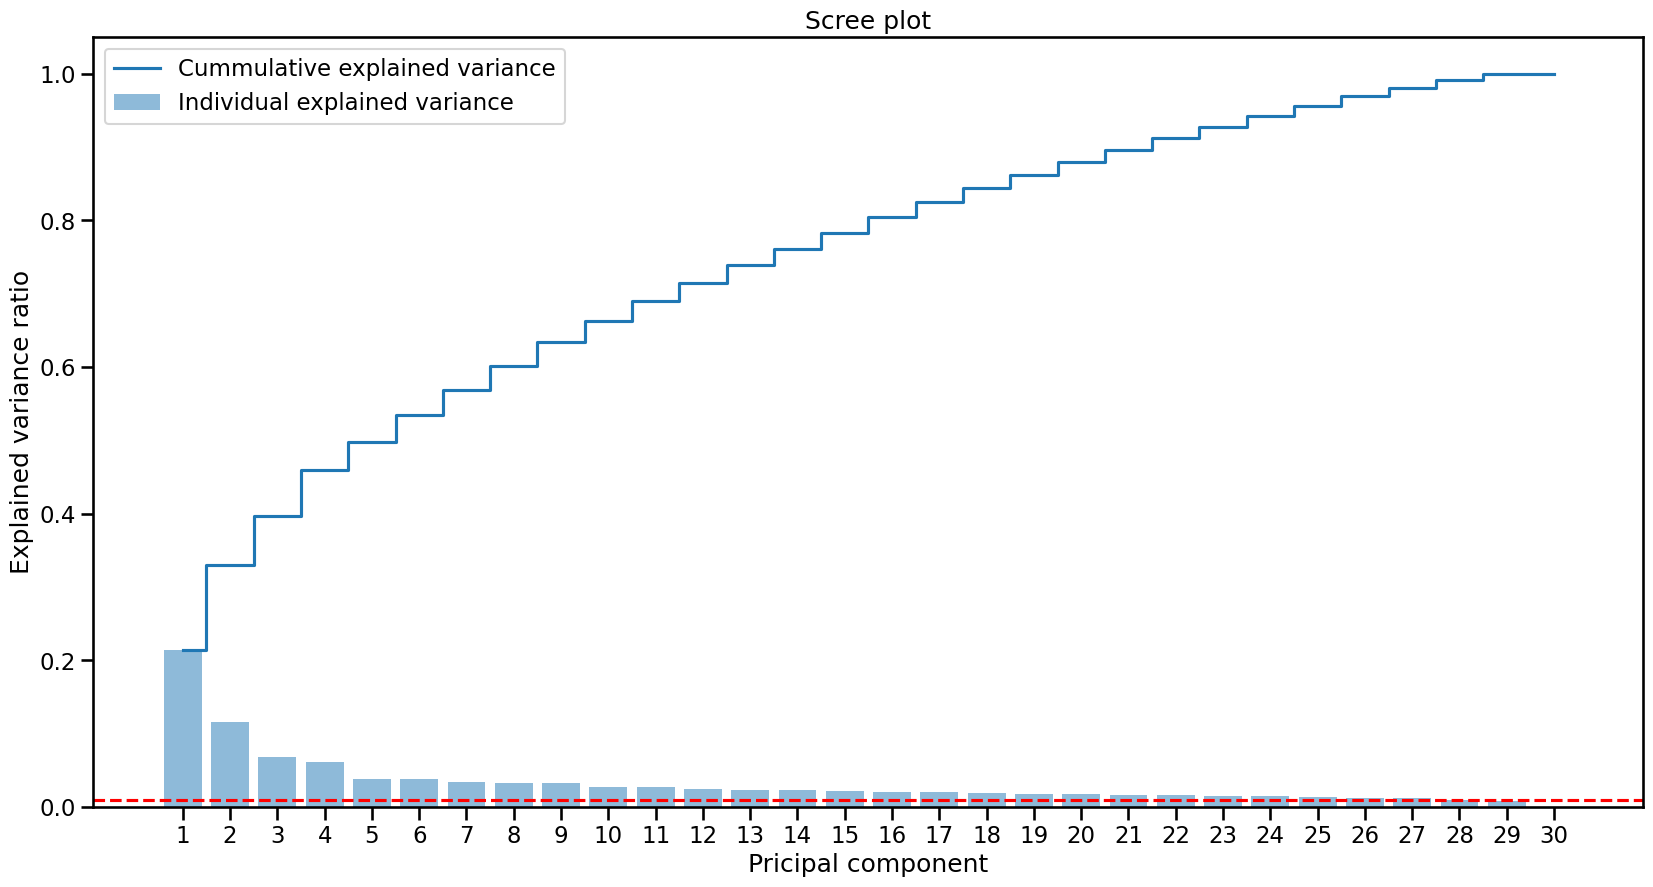

In [38]:
# plotting the scree
plt.figure(figsize=(20, 10))
plt.bar(components, explained_variance, alpha=0.5, align="center", label="Individual explained variance")
plt.step(components, np.cumsum(explained_variance), where="mid", label="Cummulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Pricipal component")
plt.title("Scree plot")
plt.legend(loc="best")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.xticks(components)
plt.show()

From the visualization above, the elbow can be seen to be on the 2nd principal component. The above scree plot is a graphical representation that is used to determine the number of retaining factors of a principal component. The above plot displays the eigenvalues of each factors in the principal component data. From the plot above, the elbow which is situated at the 2nd principal component gives the point where the eigenvalue levels off.

## CRONBACHS TEST

In [39]:
# implementation of the formula for the cronbach test
def cronbach_alpha(df):
    N = df.shape[1]
    variances = df.var(axis=0)
    total_var = variances.sum()
    cov_matrix = df.cov()
    avg_cov = cov_matrix.sum().sum() / (N * (N - 1))
    alpha = (N * avg_cov) / (total_var + (N - 1) * avg_cov)
    return alpha

In [40]:
value = cronbach_alpha(data_standard)

In [41]:
print(f"Cronbachs Alpha : {value}")

Cronbachs Alpha : 0.1214633589482607


## USING INTERPRETATIONS FROM PCA FOR CRONBACH

In [42]:
# specifying the n_components
pca =  PCA(n_components = 2)
column_pca = pca.fit_transform(data_standard)

In [43]:
column_dataframe = pd.DataFrame(column_pca, columns = ["pc1", "pc2"])
column_dataframe

,pc1,pc2
0,2.387557,0.255077
1,2.826793,-3.578150
2,4.016176,-2.313372
3,5.997417,-1.569764
4,2.184160,0.261570
...,...,...
1011,0.317733,-0.950041
1012,-0.618380,3.095170
1013,0.503984,-0.815275
1014,-3.398223,0.134748


In [44]:
pca_value = cronbach_alpha(column_dataframe)

In [45]:
print(f"Cronbachs Alpha : {pca_value}")

Cronbachs Alpha : 0.6666666666666672


### VIEWING THE GENERAL CLUSTER

In [46]:

def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


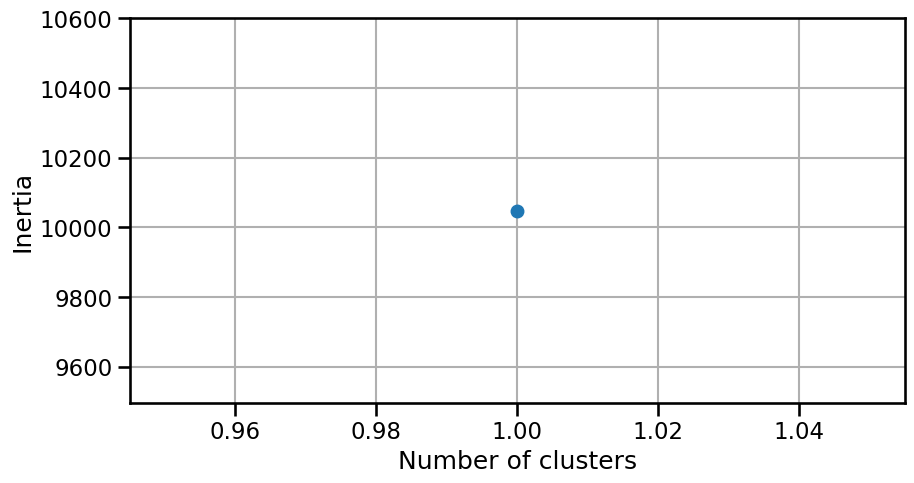

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


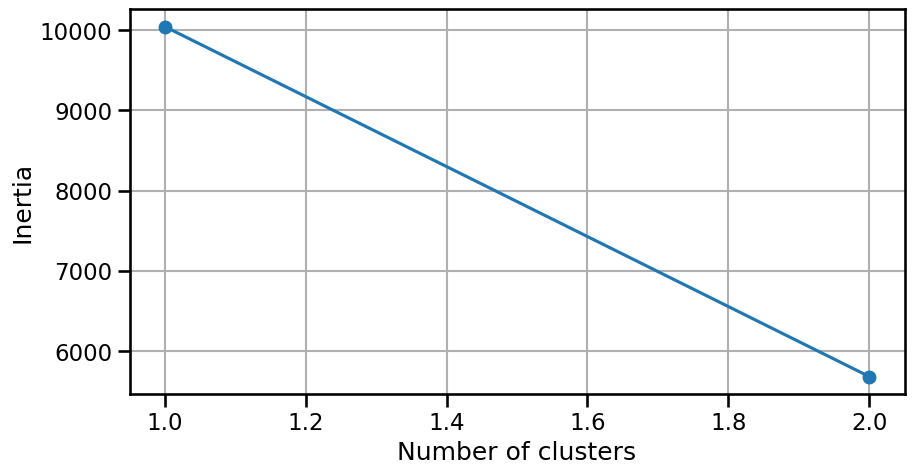

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


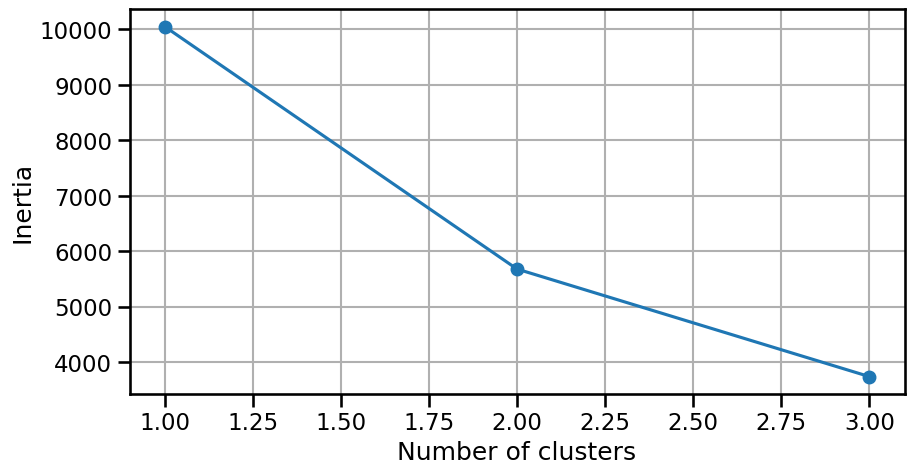

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


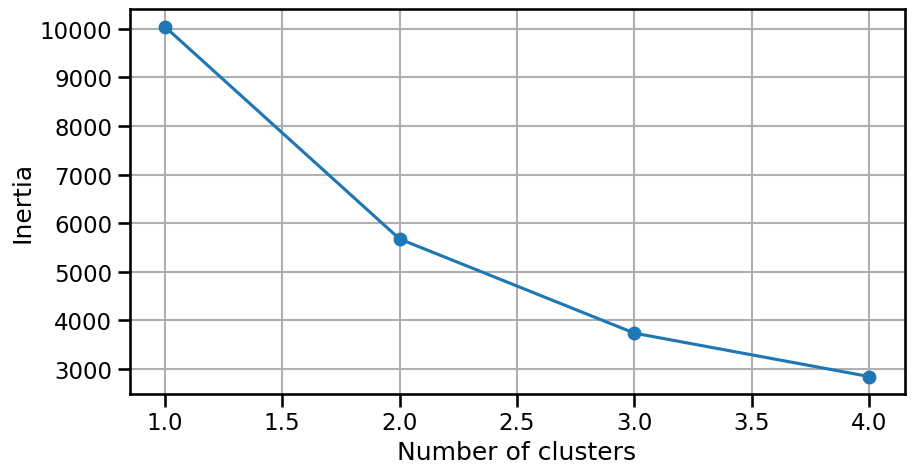

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


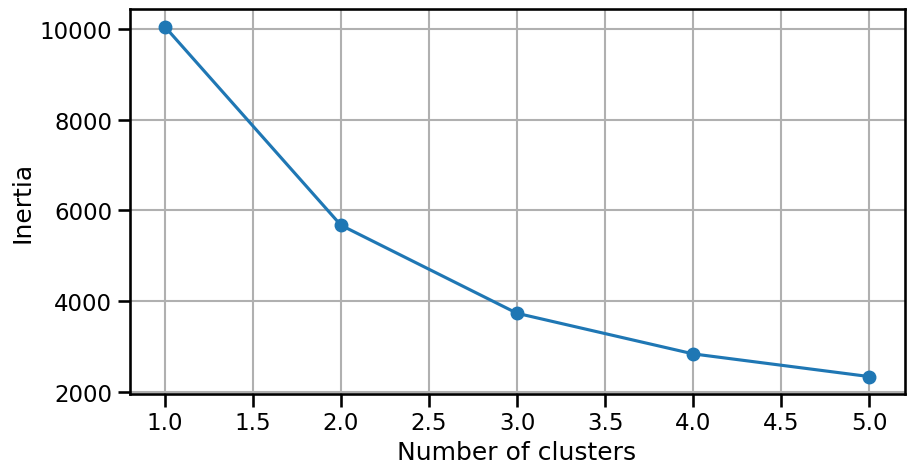

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


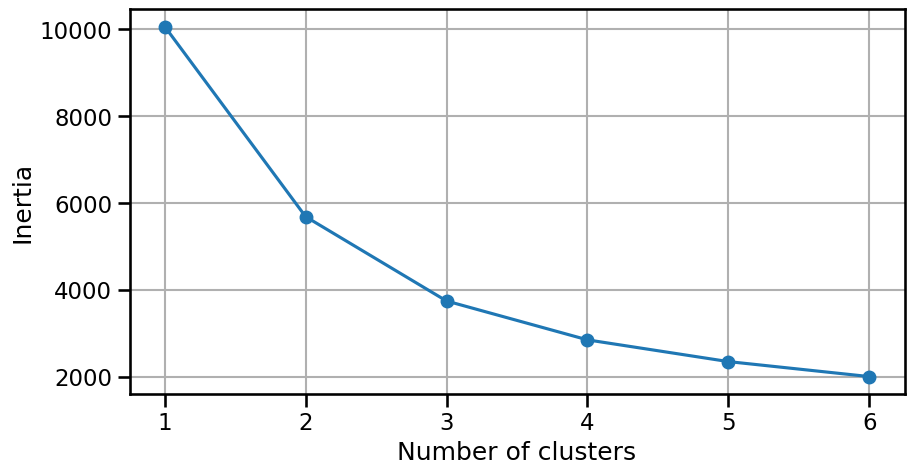

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


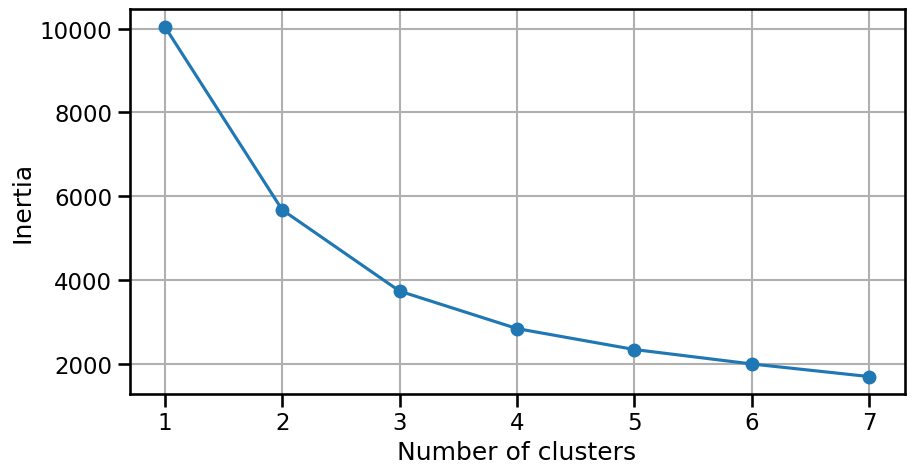

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


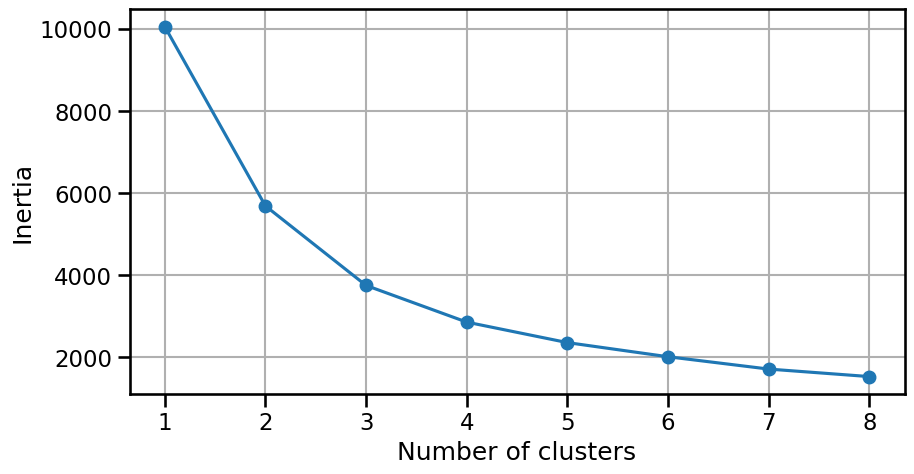

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


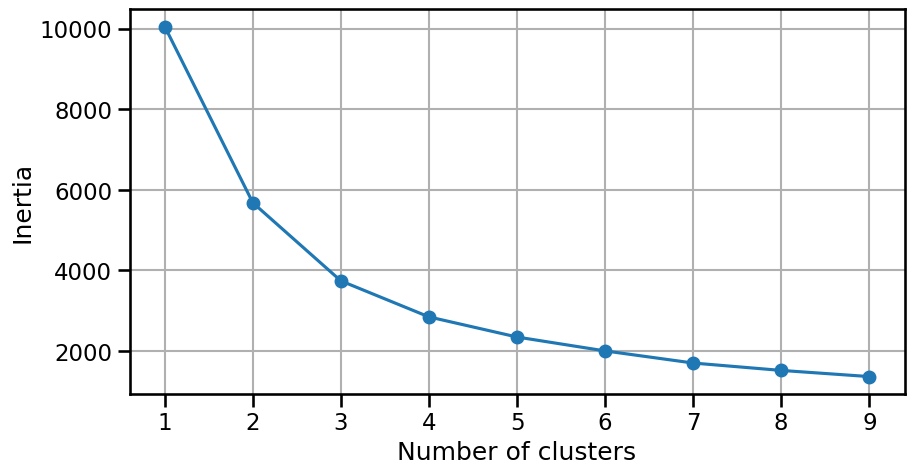

In [47]:
optimise_k_means(column_pca, 10)

The graph above shows the iteration of the kmeans when choosing the best number of clusters based on the optimal value determined by the elbow method.

In [48]:
# initialize the kmeans
kmeans = KMeans(n_clusters = 3)

In [49]:
kmeans.fit(column_pca)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
column_dataframe["kmeans"] = kmeans.labels_
column_dataframe

,pc1,pc2,kmeans
0,2.387557,0.255077,2
1,2.826793,-3.578150,2
2,4.016176,-2.313372,2
3,5.997417,-1.569764,2
4,2.184160,0.261570,2
...,...,...,...
1011,0.317733,-0.950041,0
1012,-0.618380,3.095170,1
1013,0.503984,-0.815275,0
1014,-3.398223,0.134748,0


<Axes: xlabel='pc1', ylabel='pc2'>

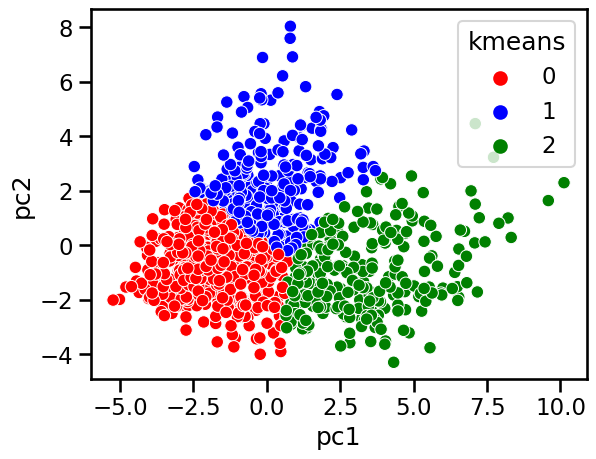

In [51]:
# visualize the points
sns.scatterplot(data=column_dataframe, x="pc1", y="pc2", hue="kmeans", palette = ["r","b","g"])

The kmeans algorithm is a clustering technique that groups data point according to the number of clusters determined by the centroids in each cluster. This means that the data clusters have data which behave in a simiar way to the other data in the same group, just like a graphical representation of a cronbach's test. In the above, the items realized from the dimensionality reduction was used to create clusters showing how each data point relate to each other.

# LOGISTIC REGRESSION

In [52]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", LogisticRegression(random_state=46))
])

In [53]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', LogisticRegression(random_state=46))])

In [54]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [55]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.12%


In [56]:
# make predictions
y_pred = pipeline.predict(X_test)

In [57]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97       192
           2       0.00      0.00      0.00        12

    accuracy                           0.94       204
   macro avg       0.47      0.50      0.48       204
weighted avg       0.89      0.94      0.91       204



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
class_labels = ["Yes", "No"]

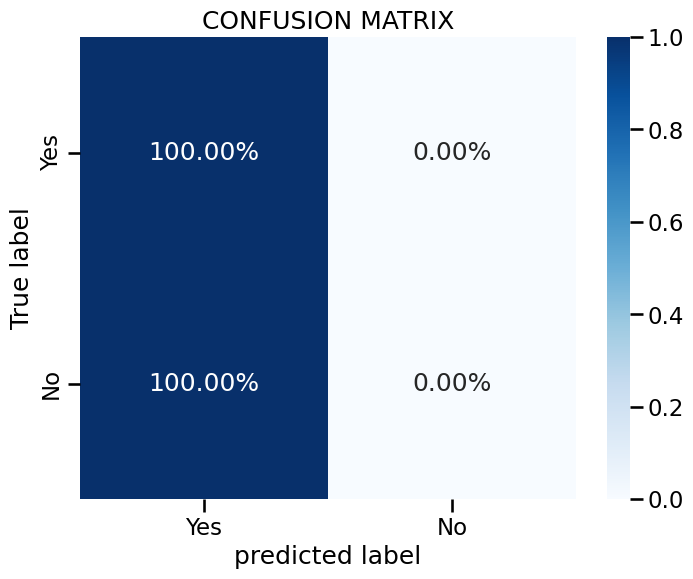

In [59]:
# CREATE A CONFUSION MATRIX
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

A confusion matrix is a performance measurement tool used for evaluating the strenght of a machine learning model. It is usually divided into four quadrants where the first quadrant is the True positive (TP), the second quadrant is the False Positive (FP), the third quadrant is the False Negative (FN) and the fourth, the True Negative (TN).

- From the above matrix, the true positive is 100.0% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 0.0% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

# RANDOM FOREST CLASSIFIER

In [60]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=46, max_depth=10))
])

In [61]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=46))])

In [62]:
# make predictions
y_pred = pipeline.predict(X_test)

In [63]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [64]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.16%


In [65]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       192
           2       0.00      0.00      0.00        12

    accuracy                           0.92       204
   macro avg       0.47      0.49      0.48       204
weighted avg       0.88      0.92      0.90       204



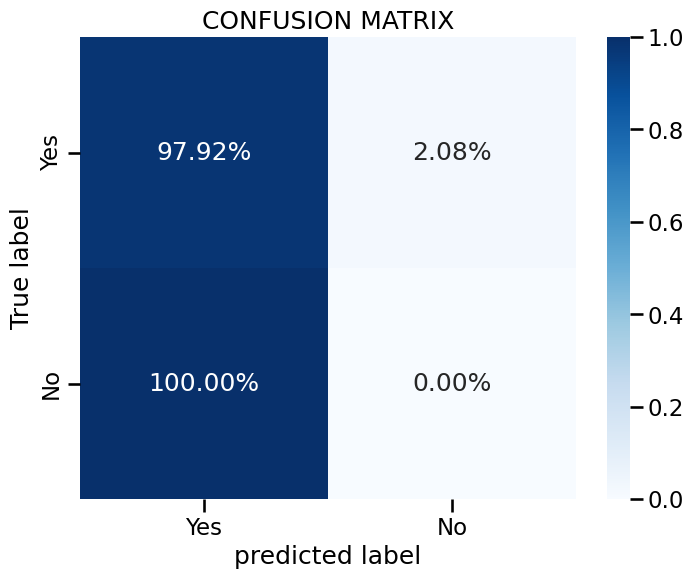

In [66]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

- From the above matrix, the true positive is 97.92% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 2.08% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

## DECISION TREES

In [67]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("decision_tree", DecisionTreeClassifier())
])

In [68]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('decision_tree', DecisionTreeClassifier())])

In [69]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [70]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.35%


In [71]:
# make predictions
y_pred = pipeline.predict(X_test)

In [72]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.88      0.90       192
           2       0.00      0.00      0.00        12

    accuracy                           0.82       204
   macro avg       0.47      0.44      0.45       204
weighted avg       0.88      0.82      0.85       204



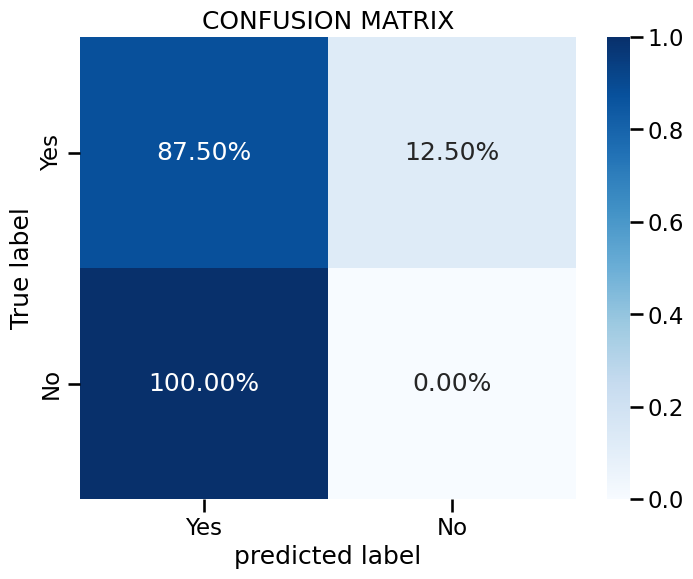

In [73]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

- From the above matrix, the true positive is 87.50% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 12.50% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.